# Project 2
## Introduction
This project analyzes employee attrition using a dataset and various data science techniques. 

The primary objectives are:
- To explore the data using EDA techniques.
- To preprocess the data for machine learning.
- To build a classification model to predict attrition.
- To visualize and interpret results.

## Dataset
The dataset contains information about employees, including demographics, job roles, and factors potentially linked to attrition.

File Path: WA_Fn-UseC_-HR-Employee-Attrition.csv
Shape: Printed at runtime to verify the dimensions of the data.


## Imports & Data Preparation
For this project i am using the following libraries:
- pandas
- Matplotlib
- Seaborn 
- scikit-learn 
- NumPy
- mlxtend
- KMeans

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score


file_path = 'WA_Fn-UseC_-HR-Employee-Attrition.csv'
employee_data = pd.read_csv(file_path)


### First Checks
We will start by settings pandas to display 1000 rows and 1000 columns so that we can check a few more values

Checking the shape of the dataset we can see that we have 35 columns and 1470 rows

In [2]:
# This will be set to see most of the infomation of any print that i make
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000); 

print("Data shape: {}".format(employee_data.shape))

Data shape: (1470, 35)


We then check the information of the dataset
As we can see we don´t have null values in any column and also the datatypes on the data frame are either int64 or object

In [3]:
# Columns datatypes and missign values to check whether i will need to remove null values
employee_data.info()
employee_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# EDA

This section explores the data to understand its structure, identify missing values, and visualize patterns.

The following commands are used to inspect the data:
- .info(): Displays column names, data types, and missing values.
- .head(): Shows the first few rows of the dataset for a quick overview.
- .describe(): Provides summary statistics for numerical columns. (.T to show in tabular form)

Lets start by describing the dataset

In [4]:
#The T is to present the describe in tabular form
employee_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


## Data visualization
Here we will try to remove single value columns.
Lets start by showing an histogram of every numeric column and then making pie charts for every non-numeric column


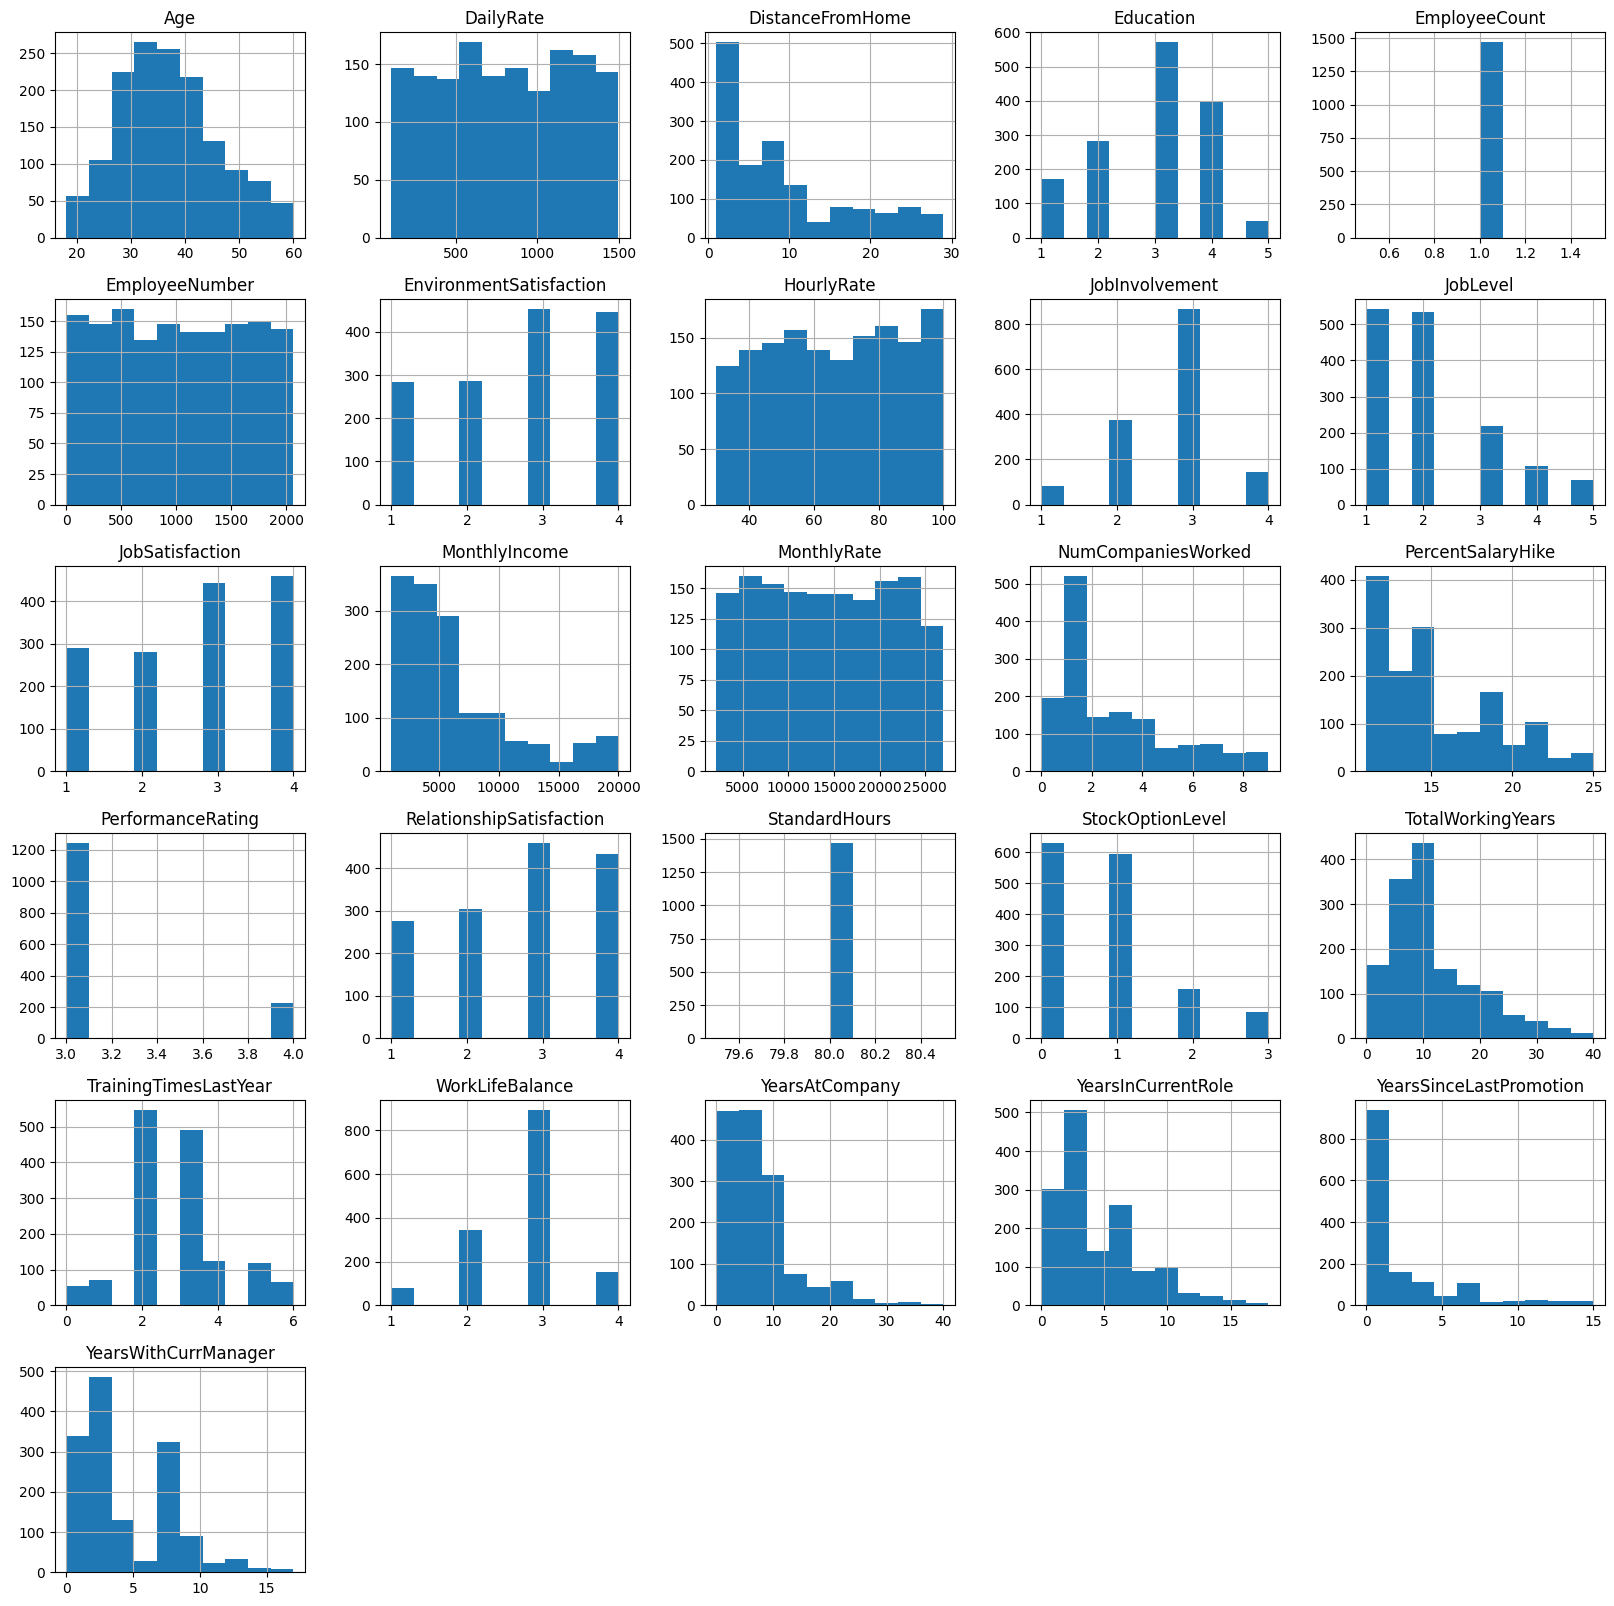

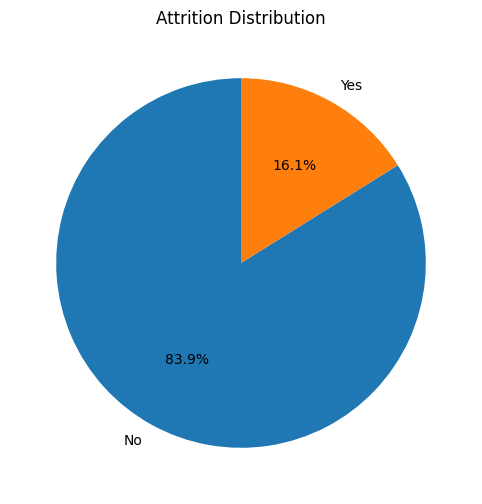

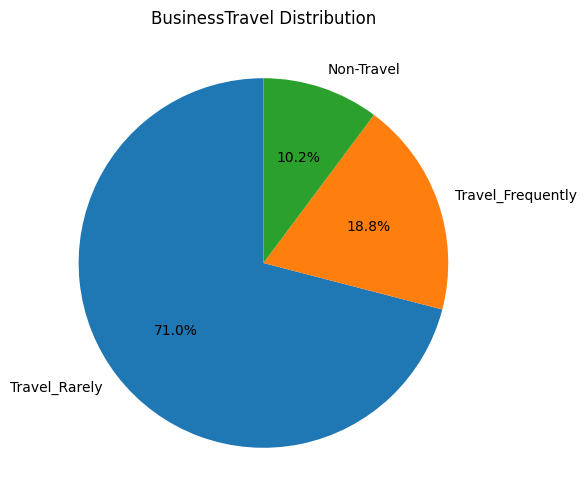

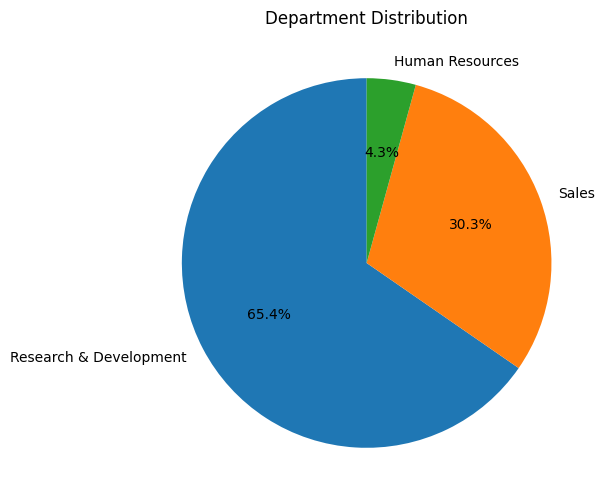

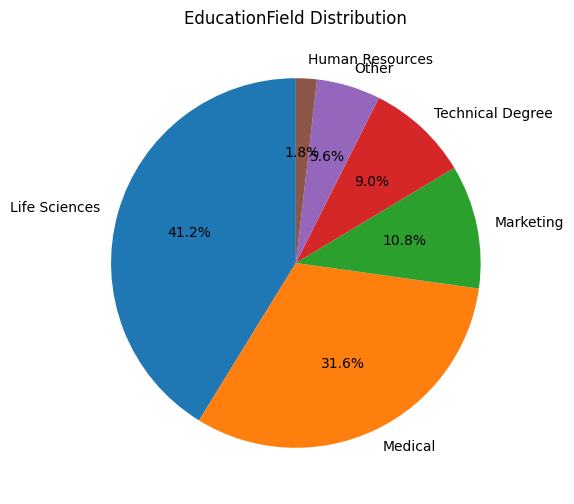

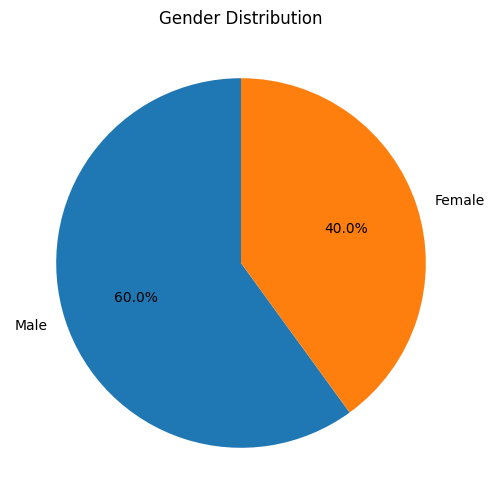

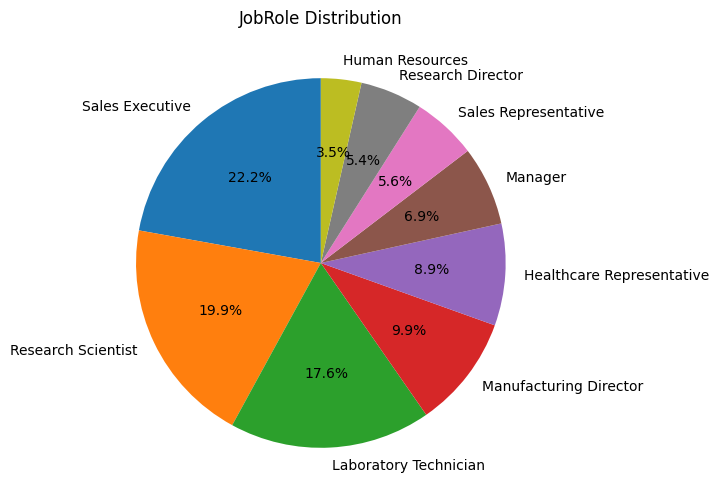

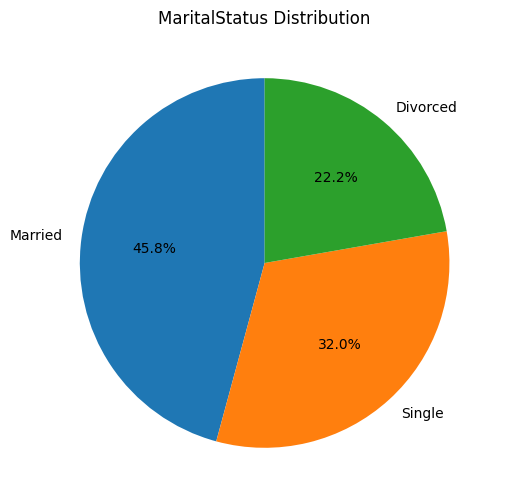

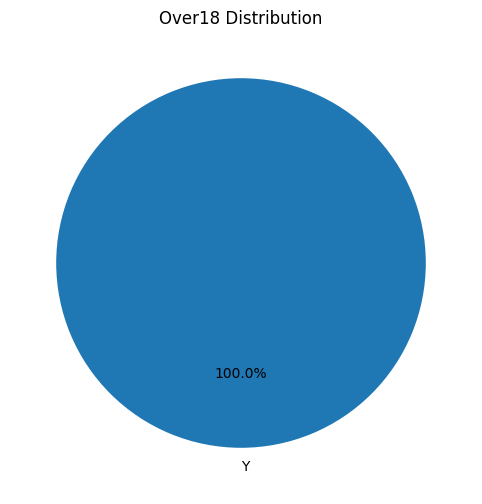

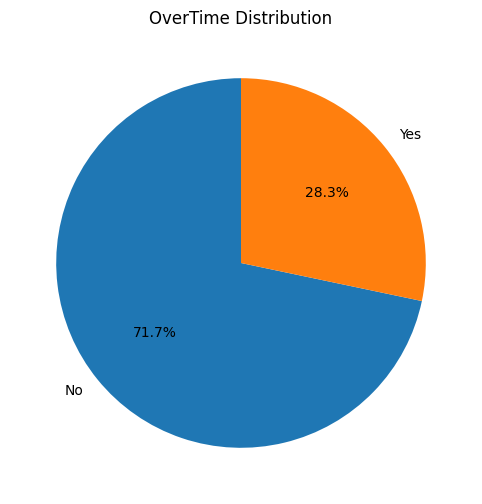

In [5]:
# Histogram to check for single value columns to remove
employee_data.hist(figsize=(20,20))
plt.show()

# Pie Chart Distrubtion for non numeric cols
for col in employee_data.select_dtypes(include='object').columns:
    counts = employee_data[col].value_counts()
    plt.figure(figsize=(8, 6), facecolor='white')
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"{col} Distribution")  # f-string for string formatting
    plt.show()


As we can see, we can remove the EmployeeCount, StandardHours, Over18 since they are single value columns

In [6]:
employee_data.drop([ 'EmployeeCount', 'StandardHours', 'Over18'], axis=1,inplace=True)

### Attrition by Job Role
This visualization shows the distribution of attrition across different job roles, helping identify roles with higher attrition rates.


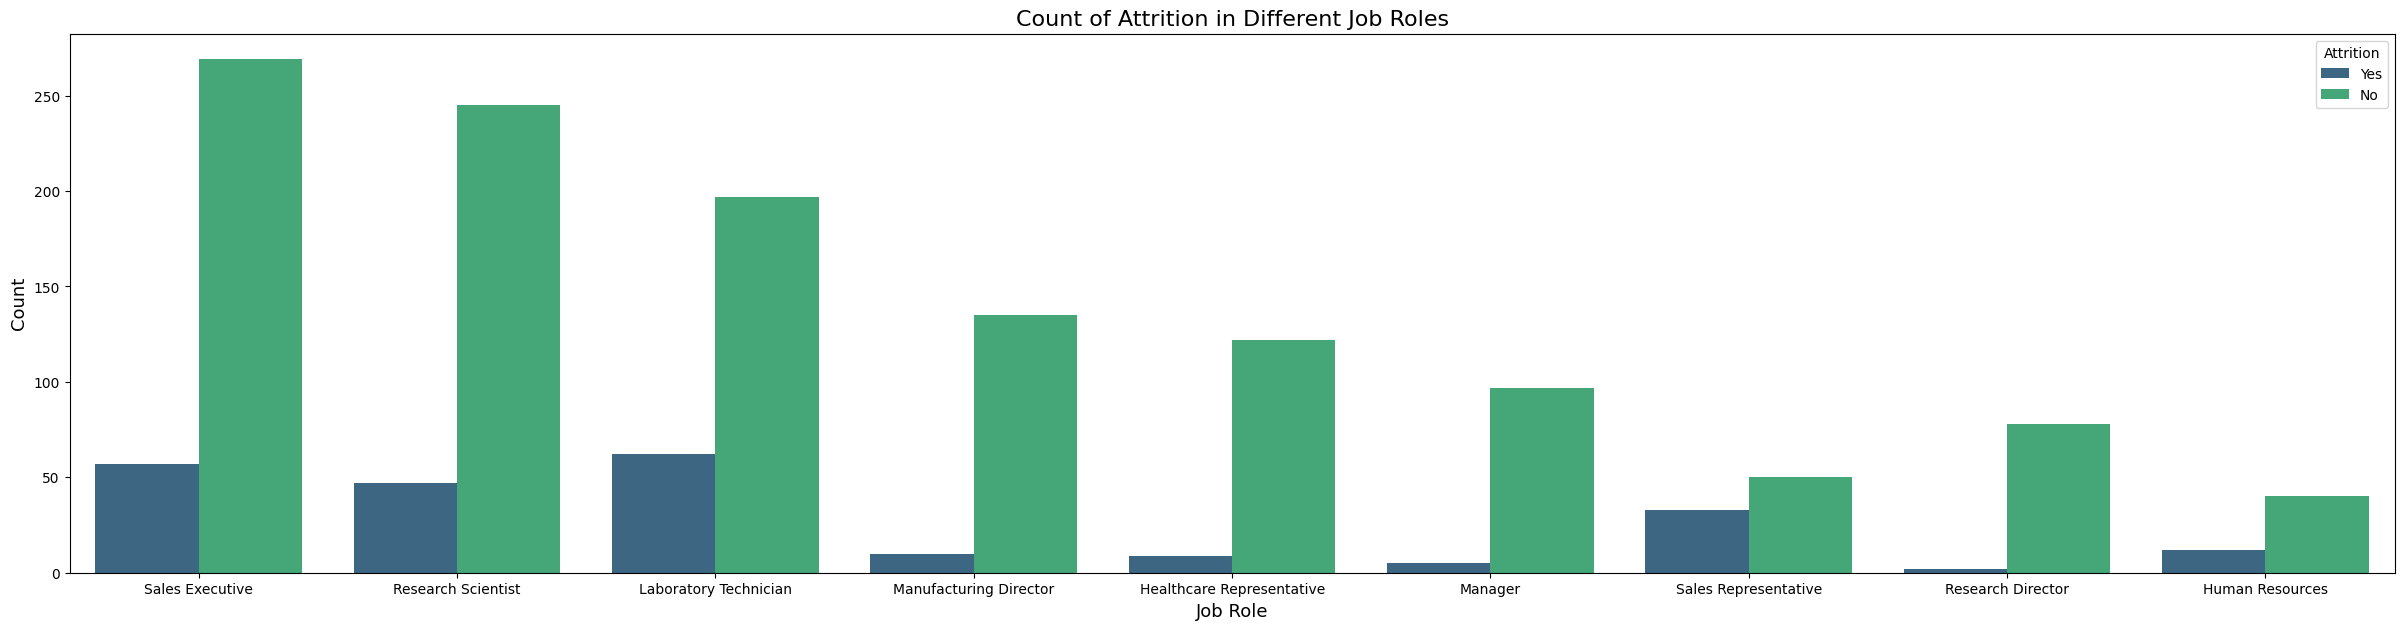

In [7]:
plt.figure(figsize=(30, 7))
sns.countplot(data=employee_data,x='JobRole', hue='Attrition', palette='viridis')
plt.title('Count of Attrition in Different Job Roles', fontsize=16)
plt.xlabel('Job Role', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

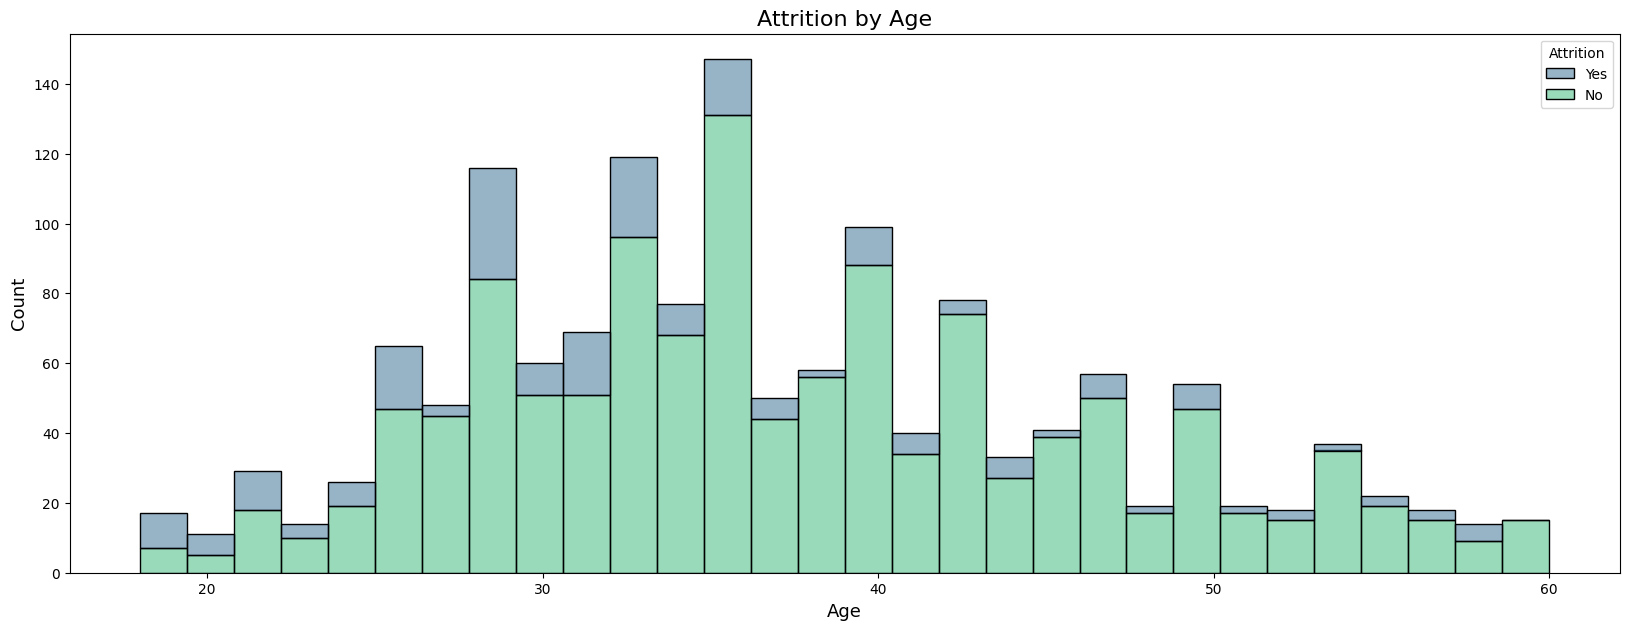

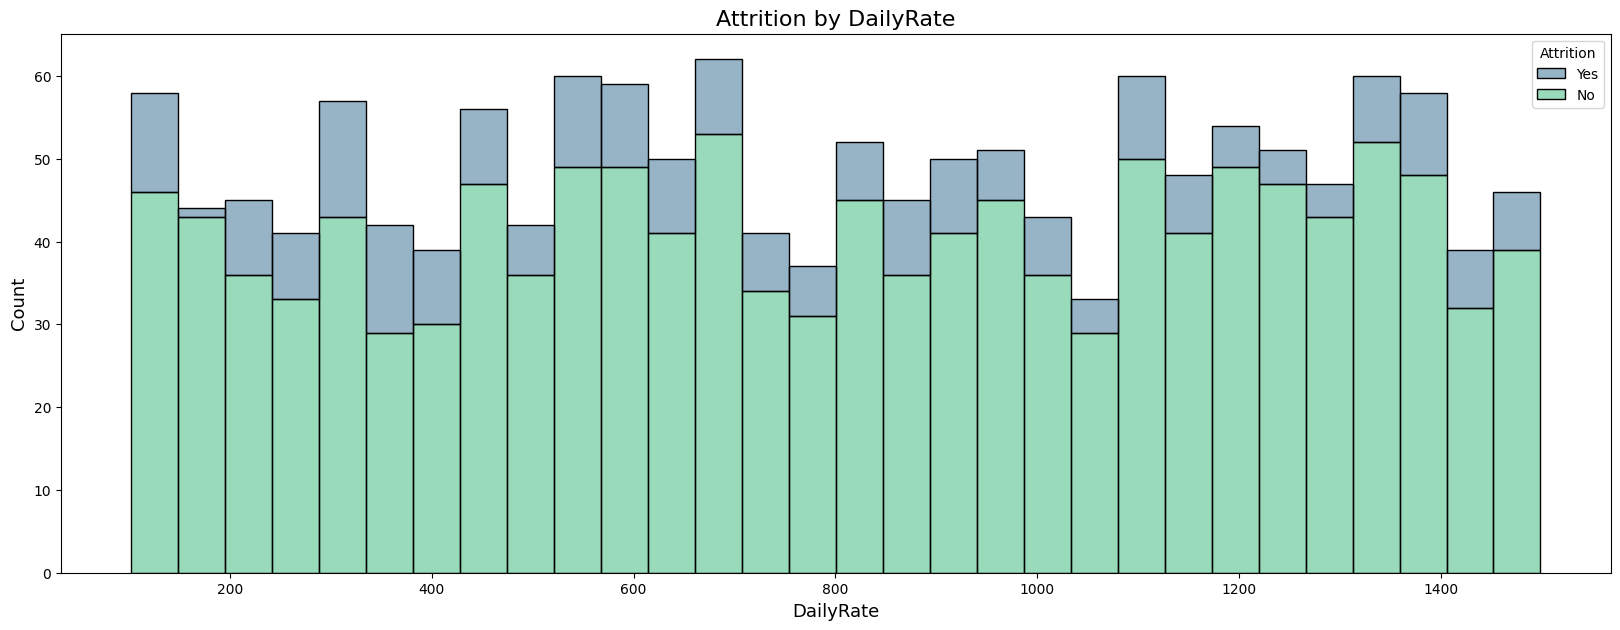

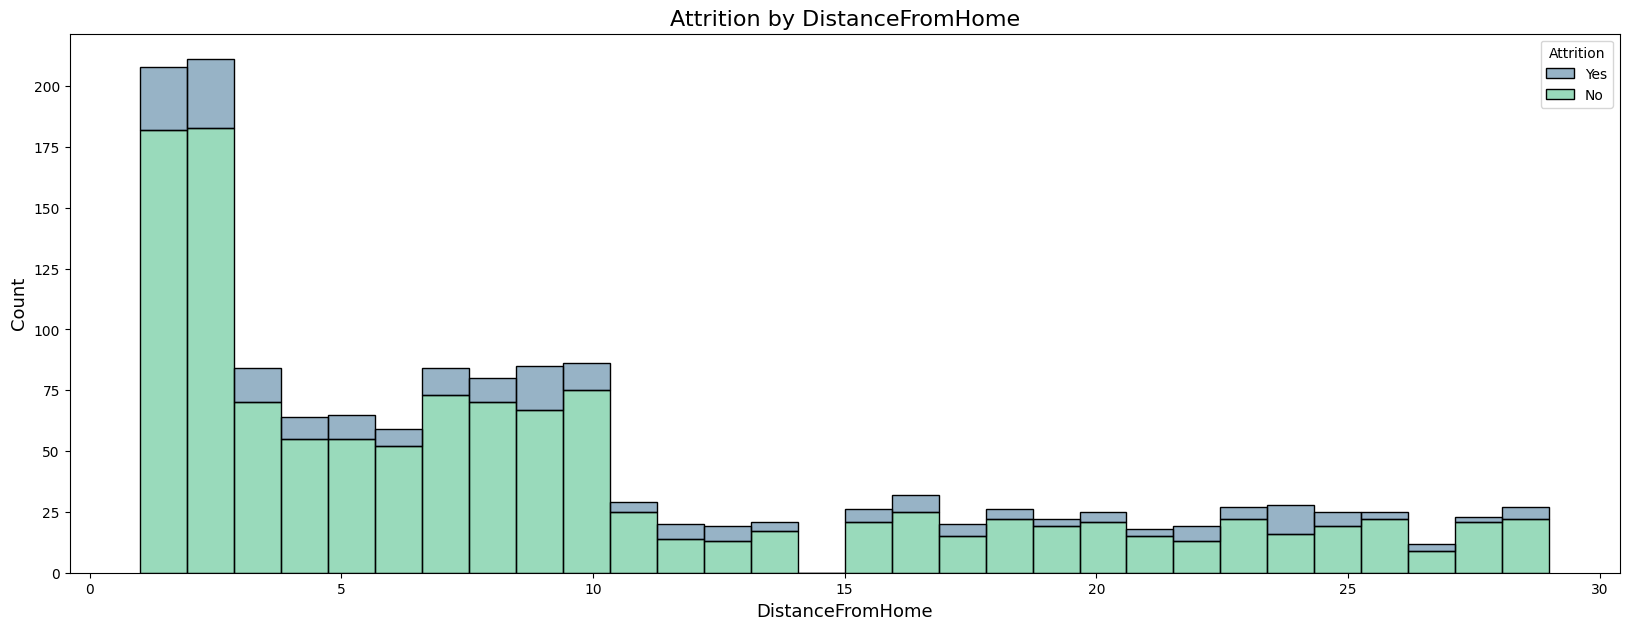

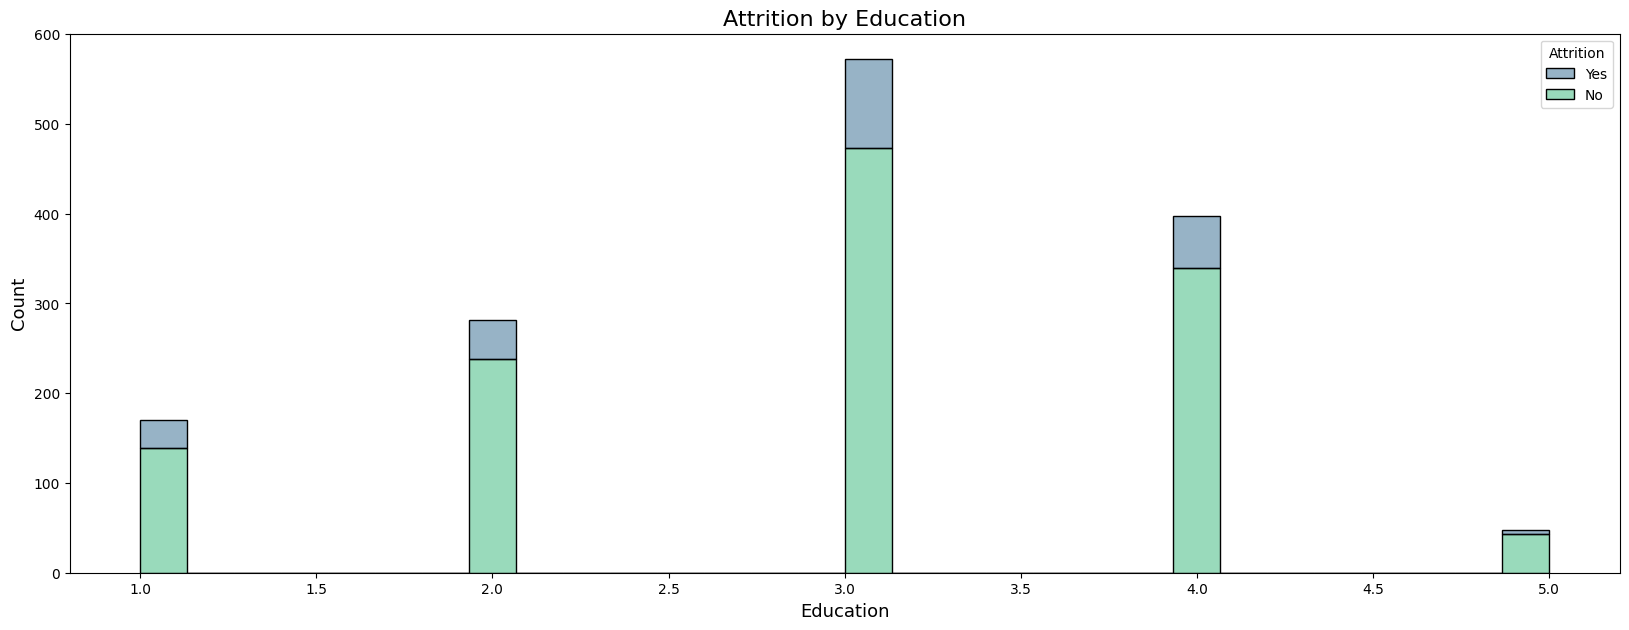

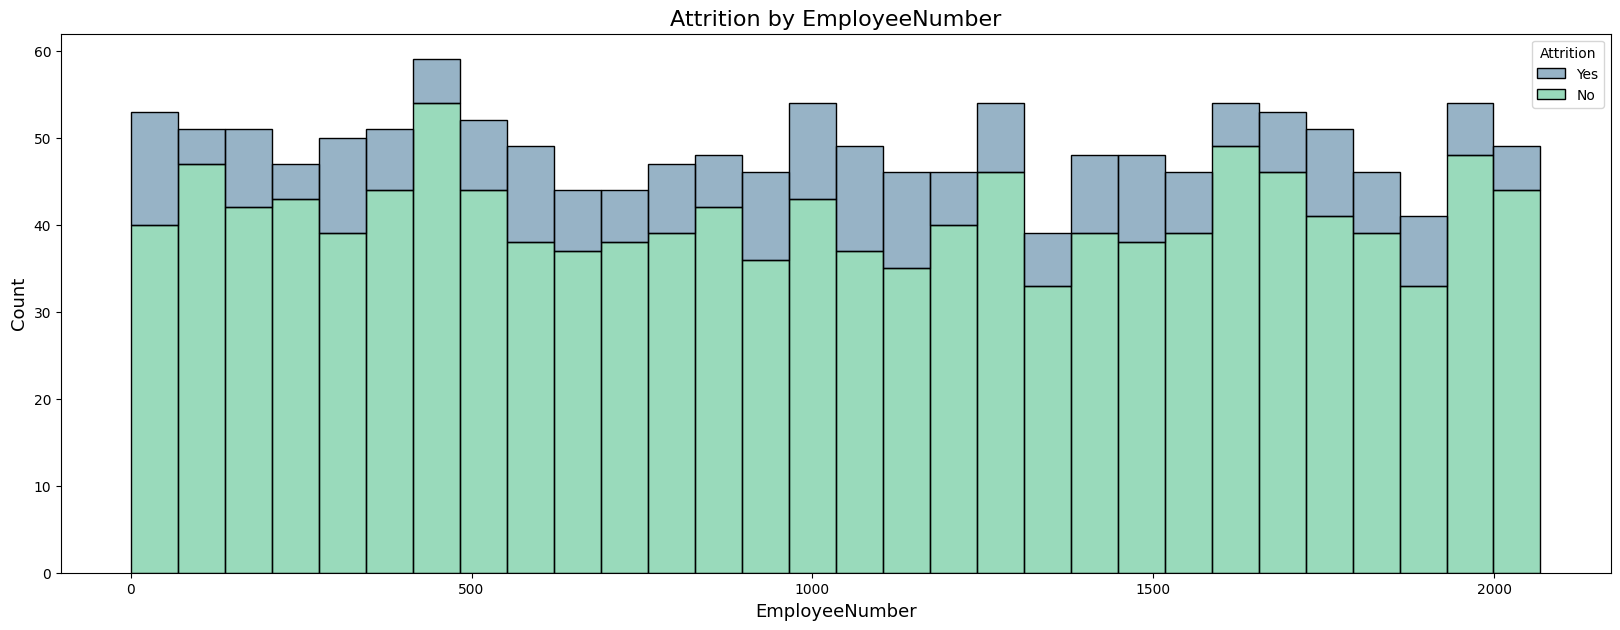

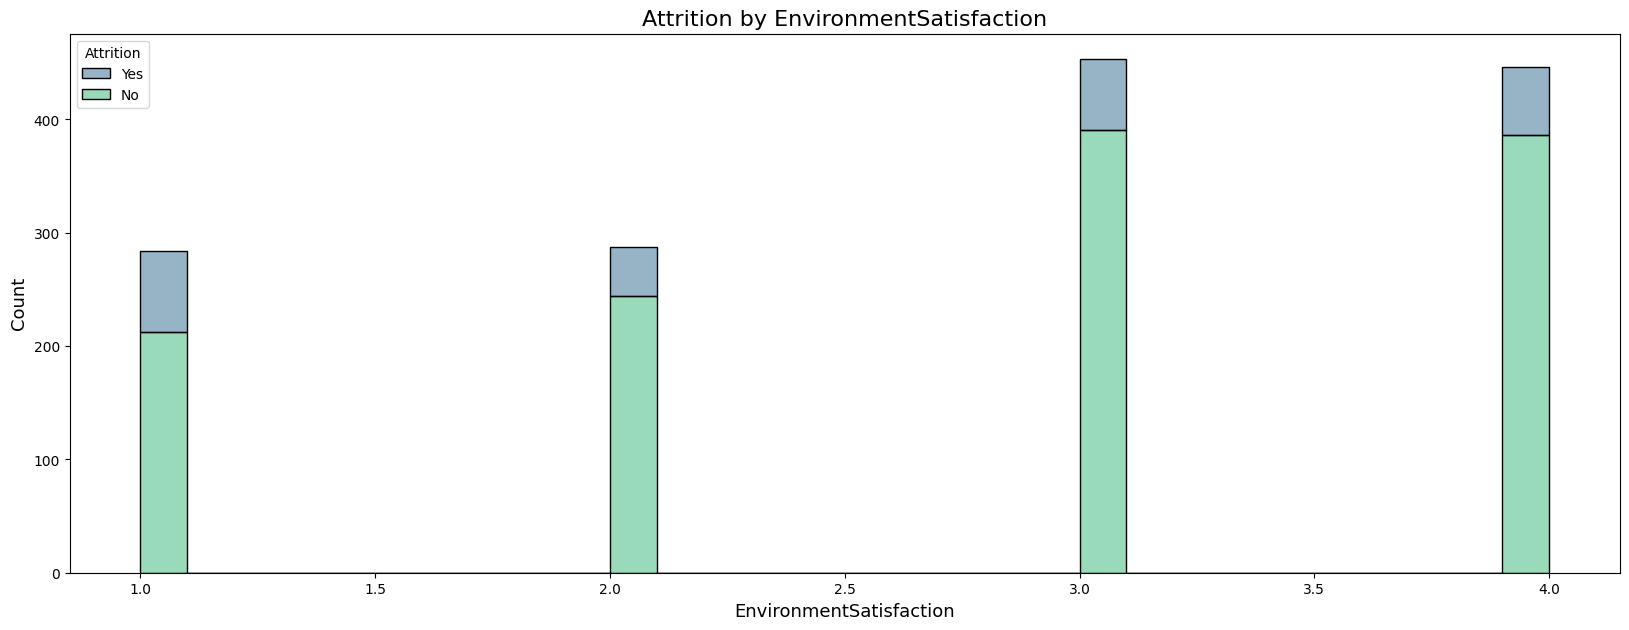

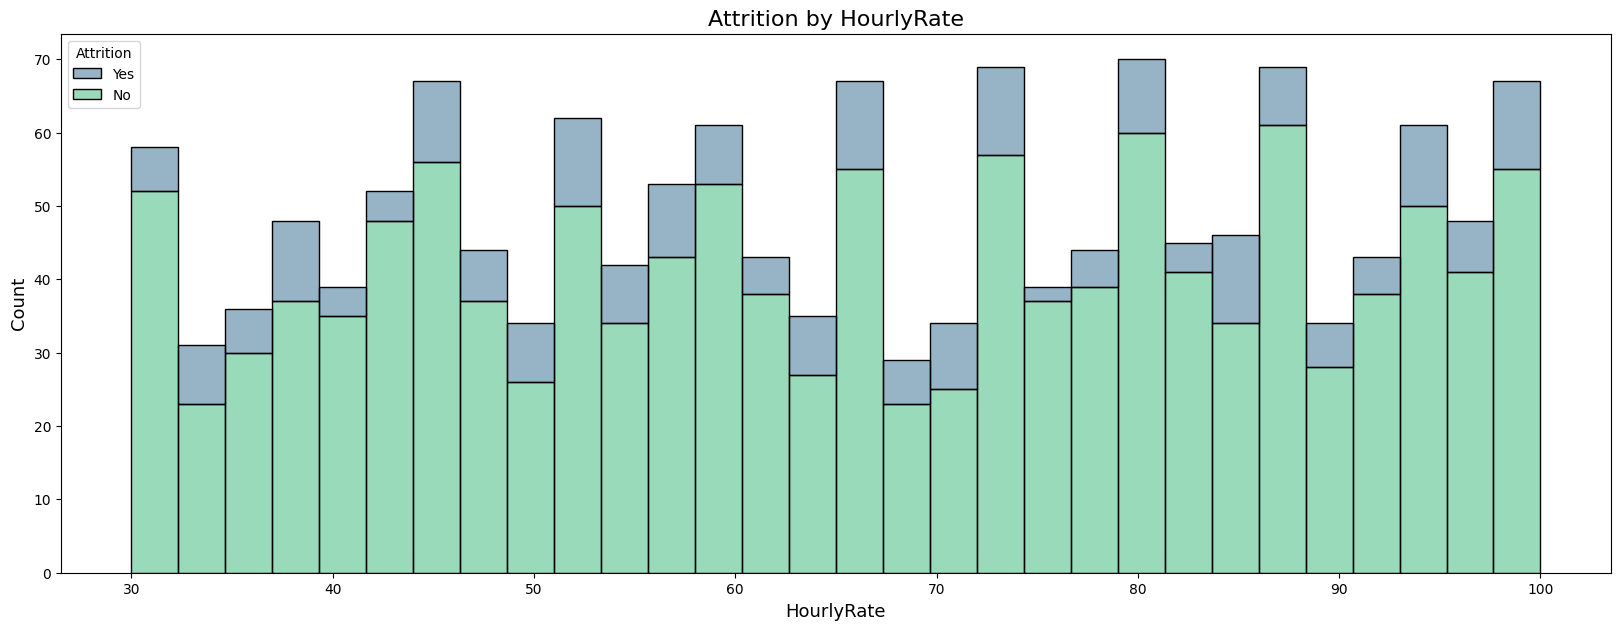

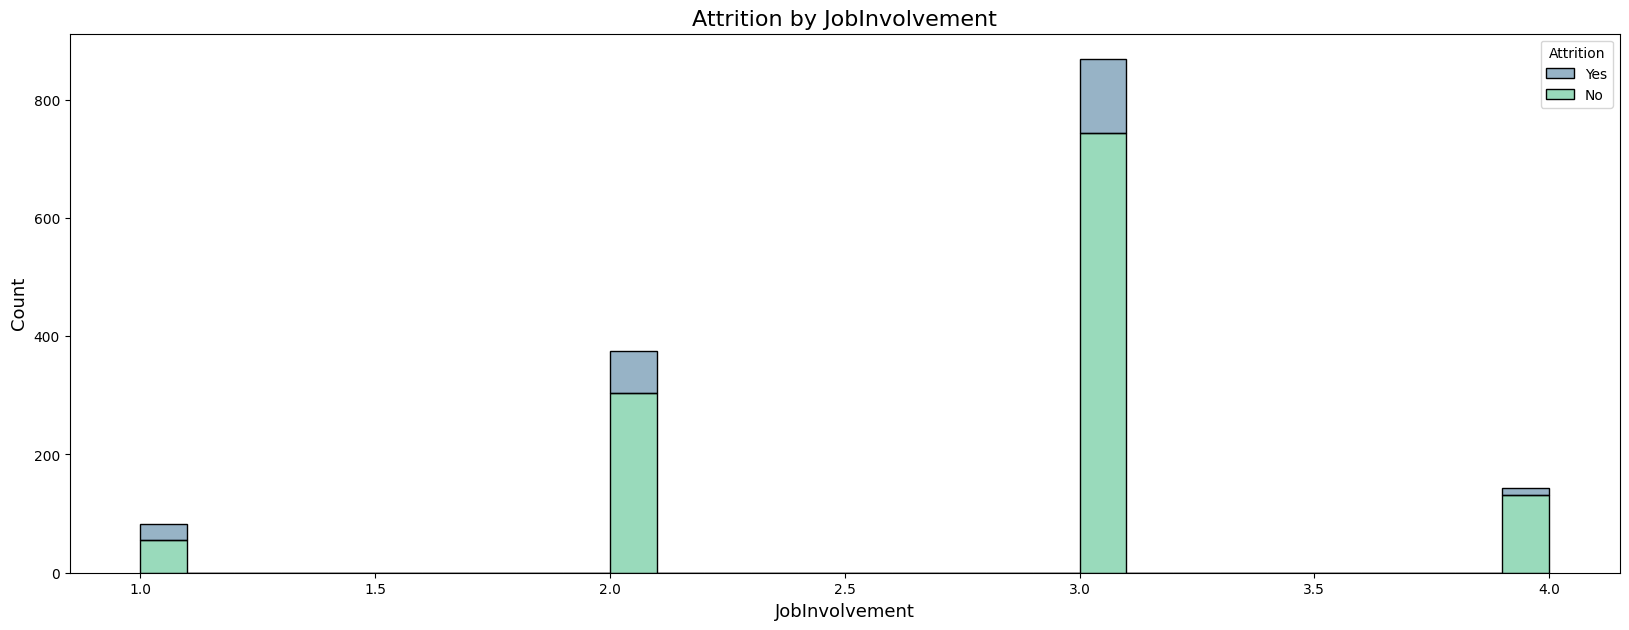

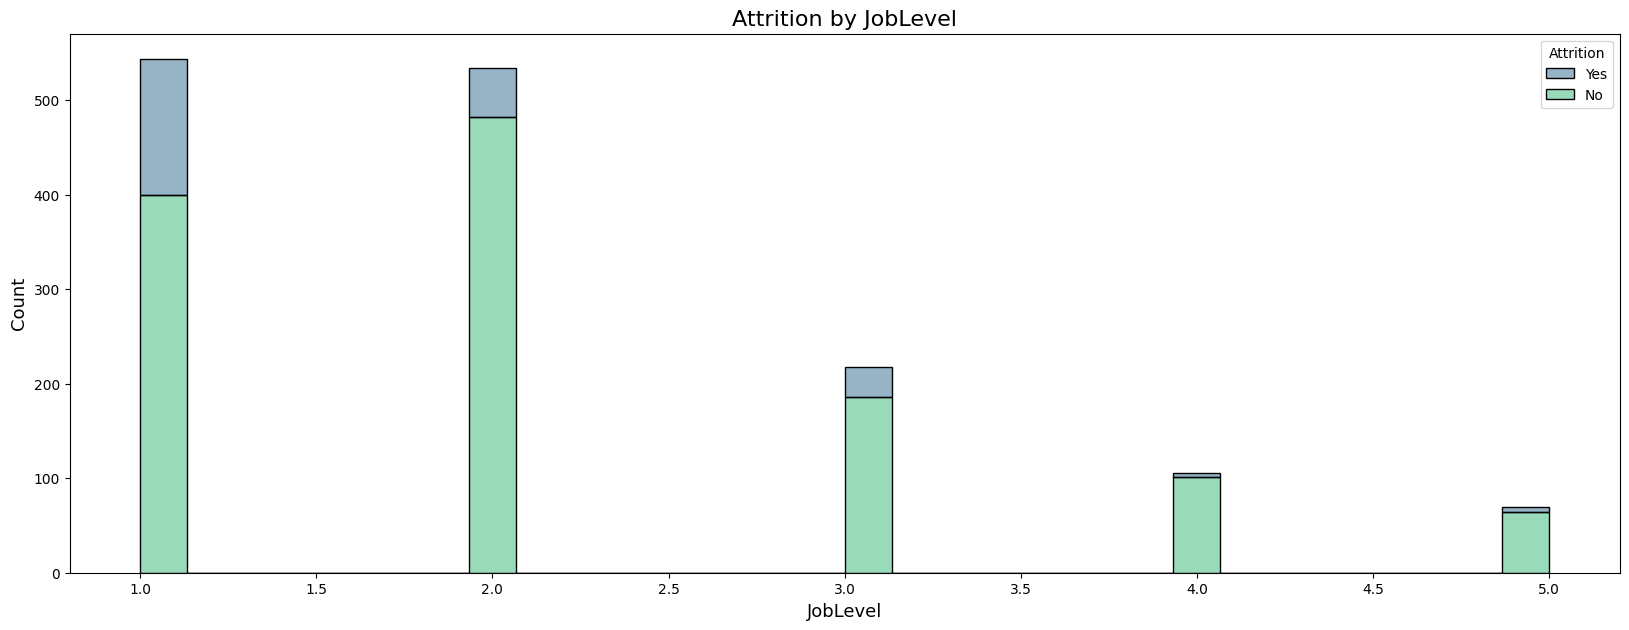

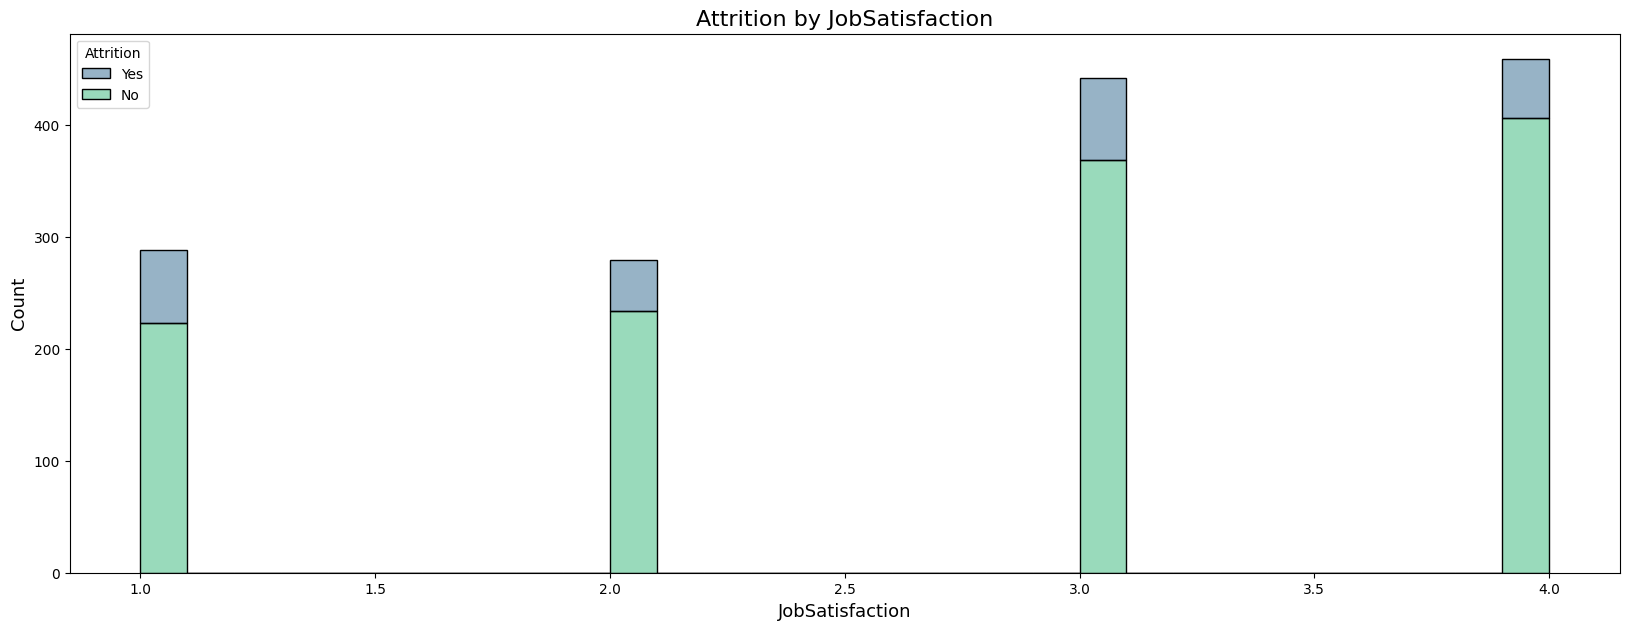

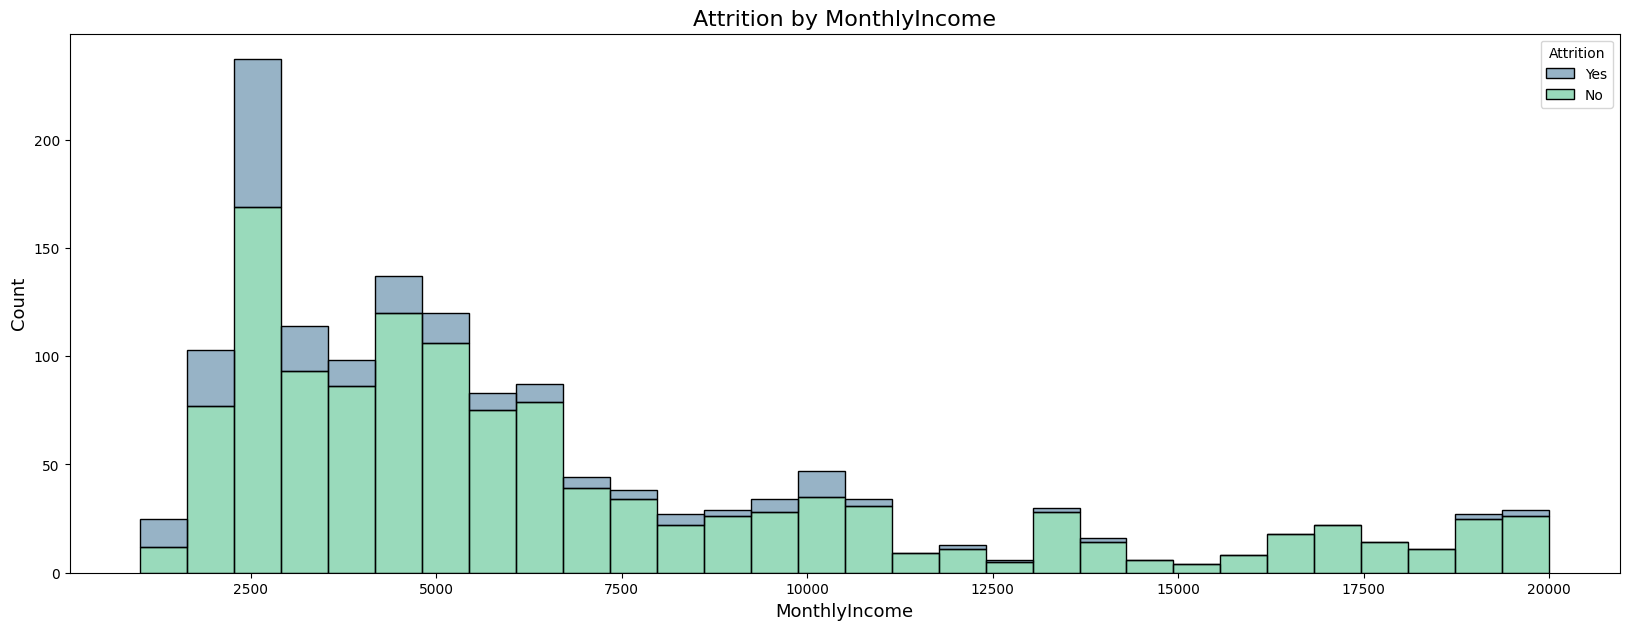

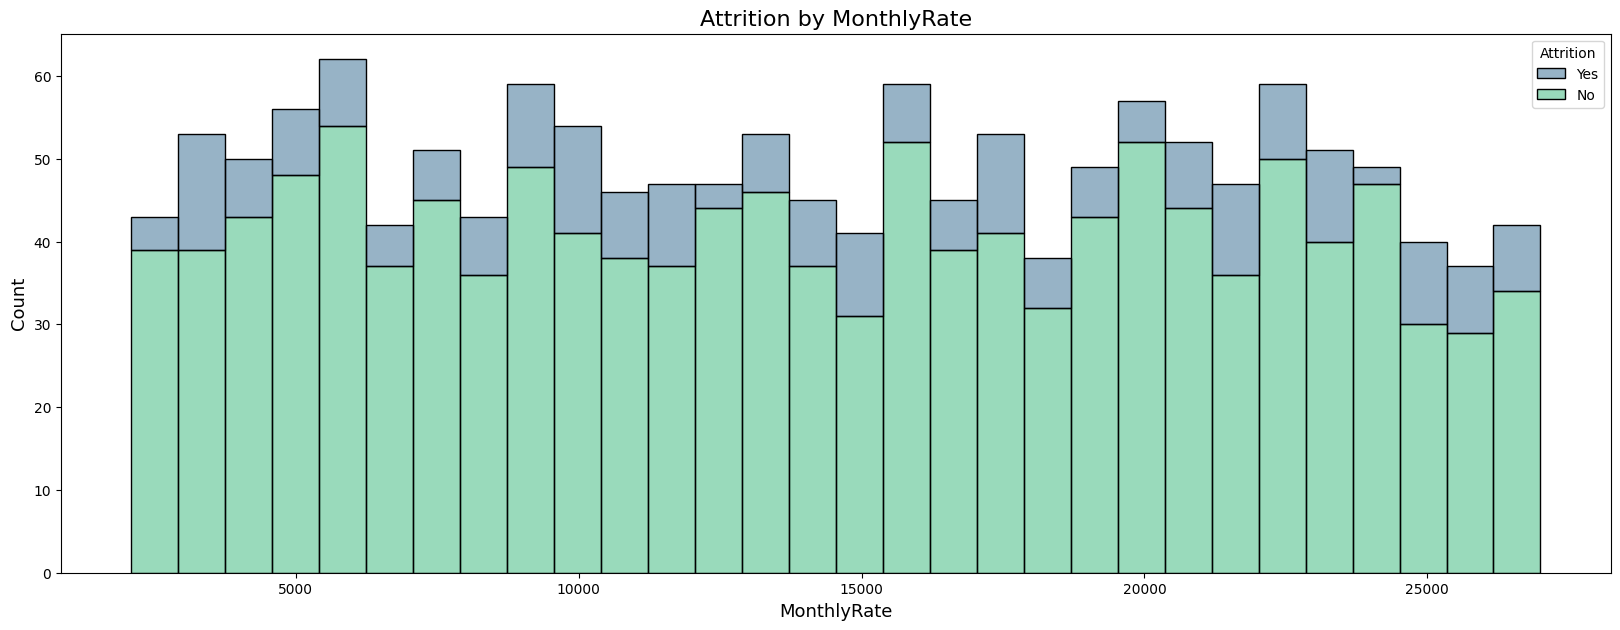

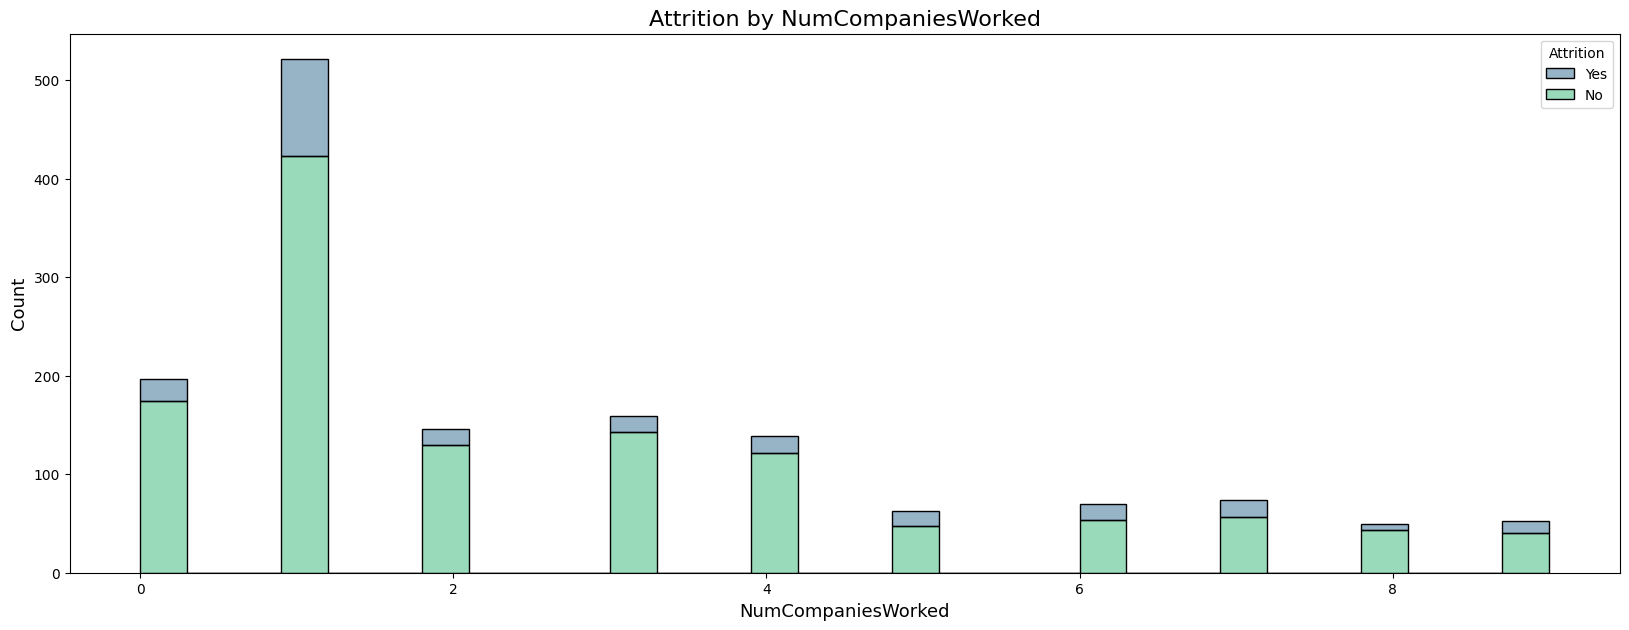

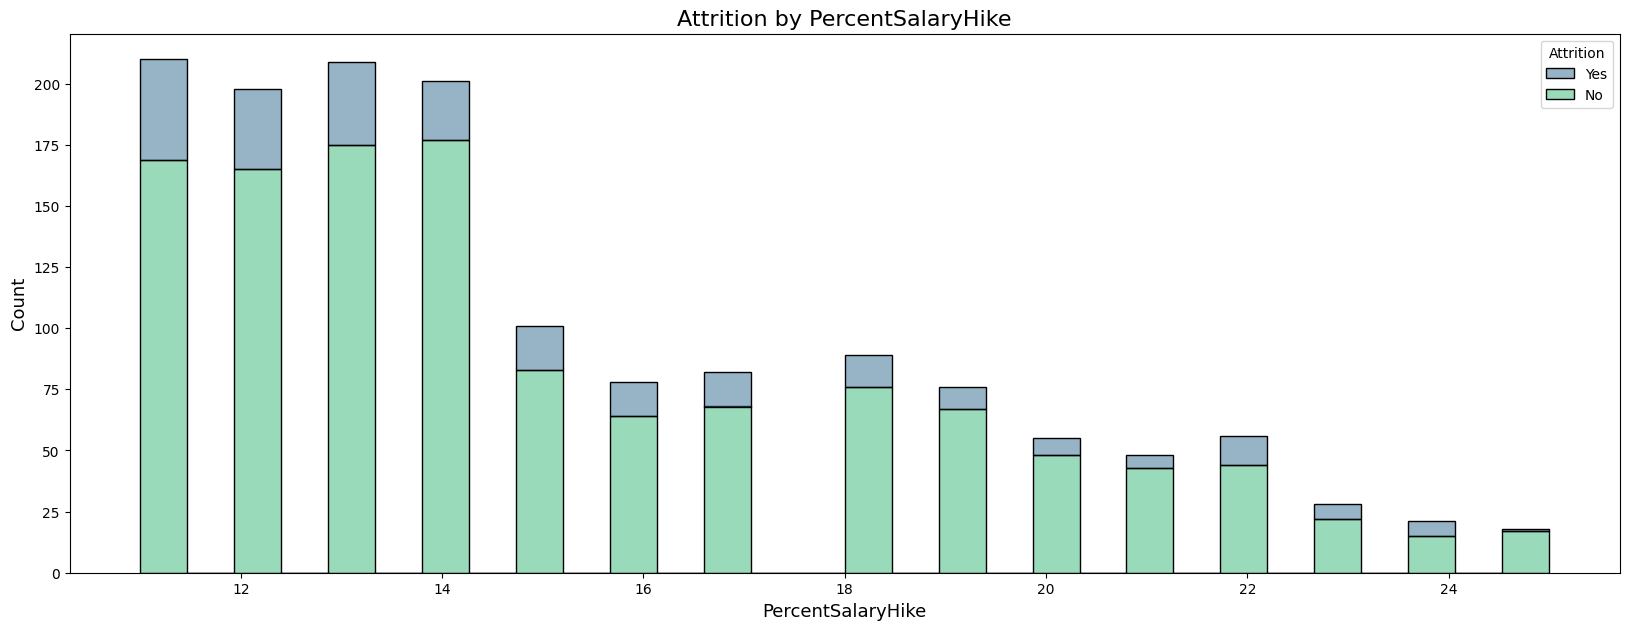

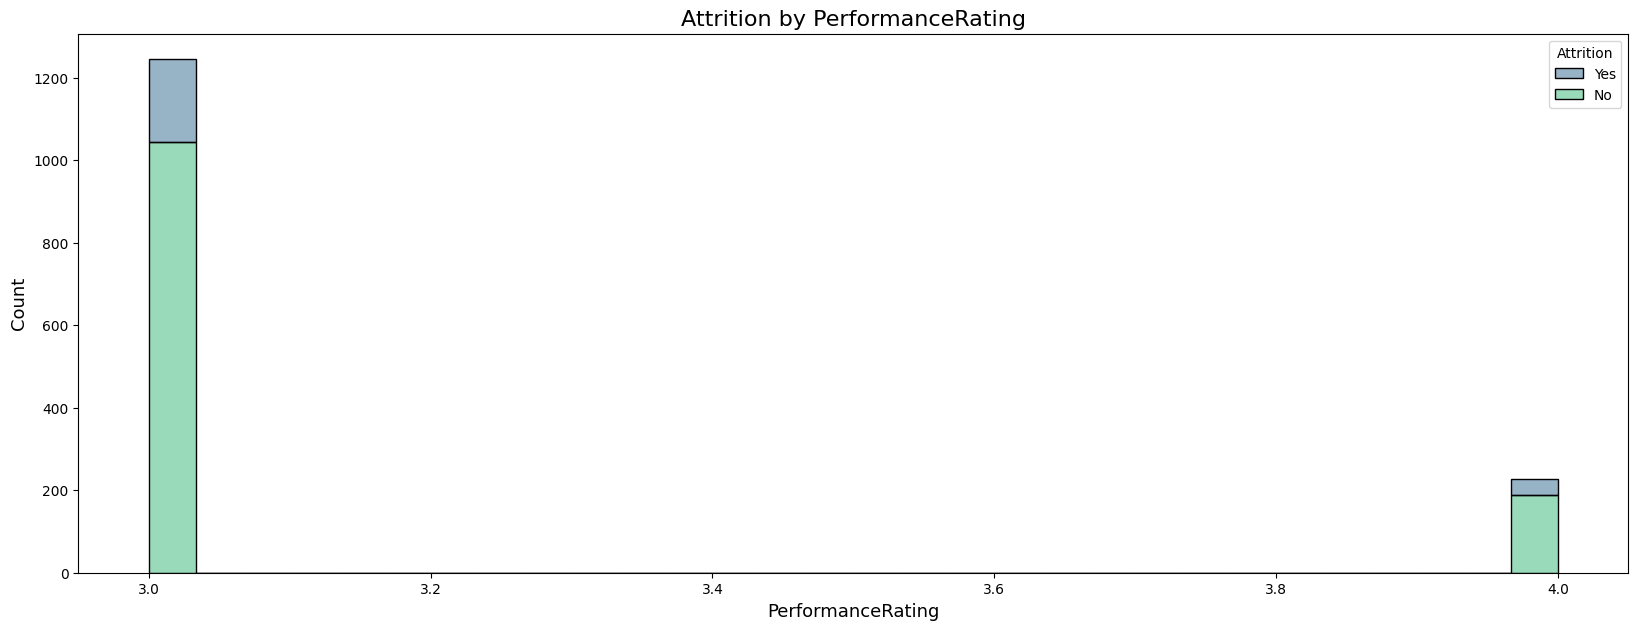

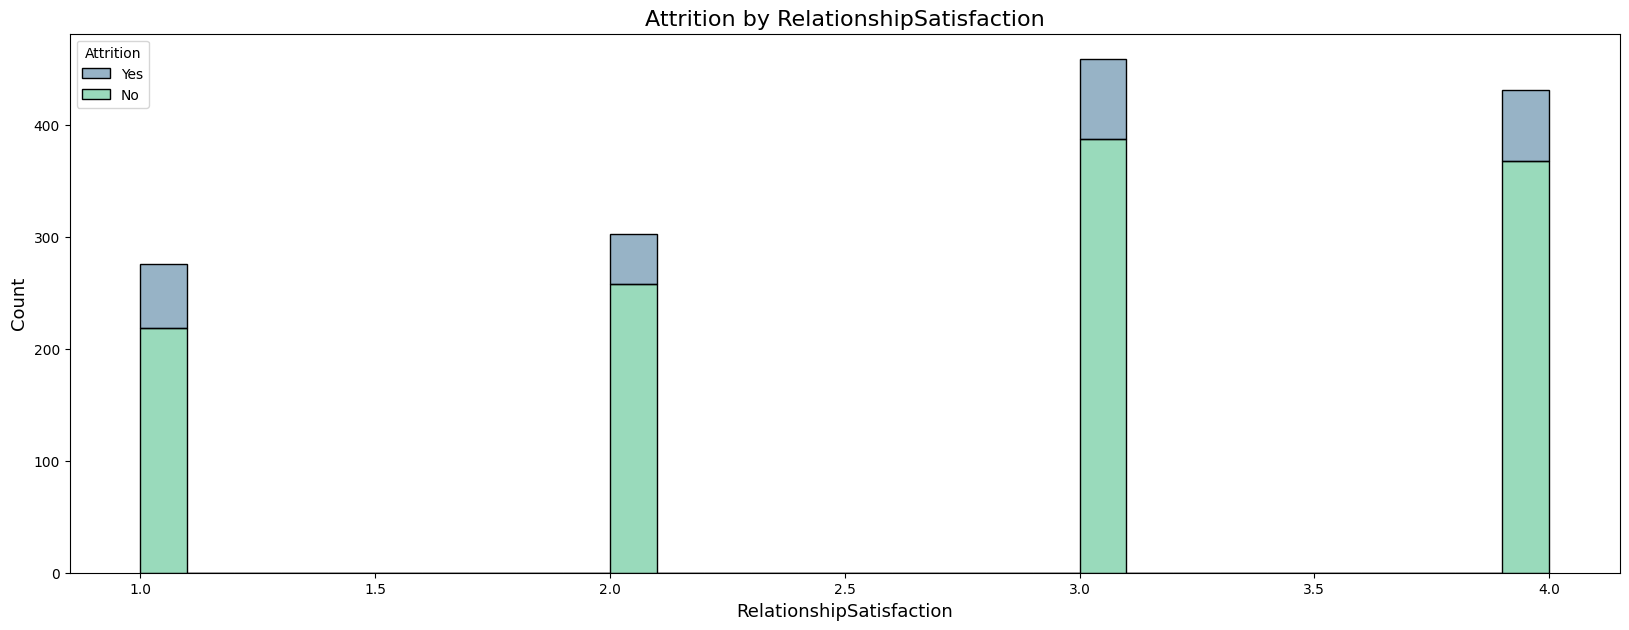

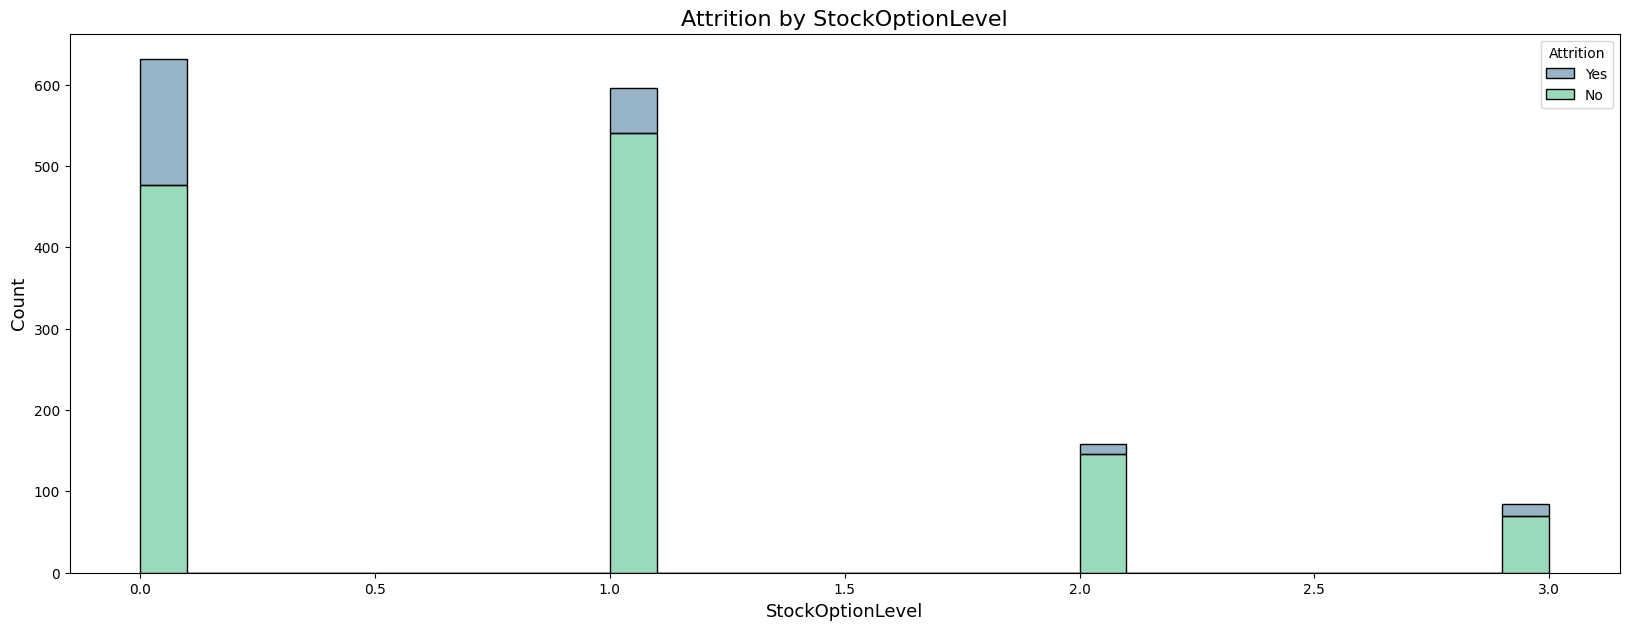

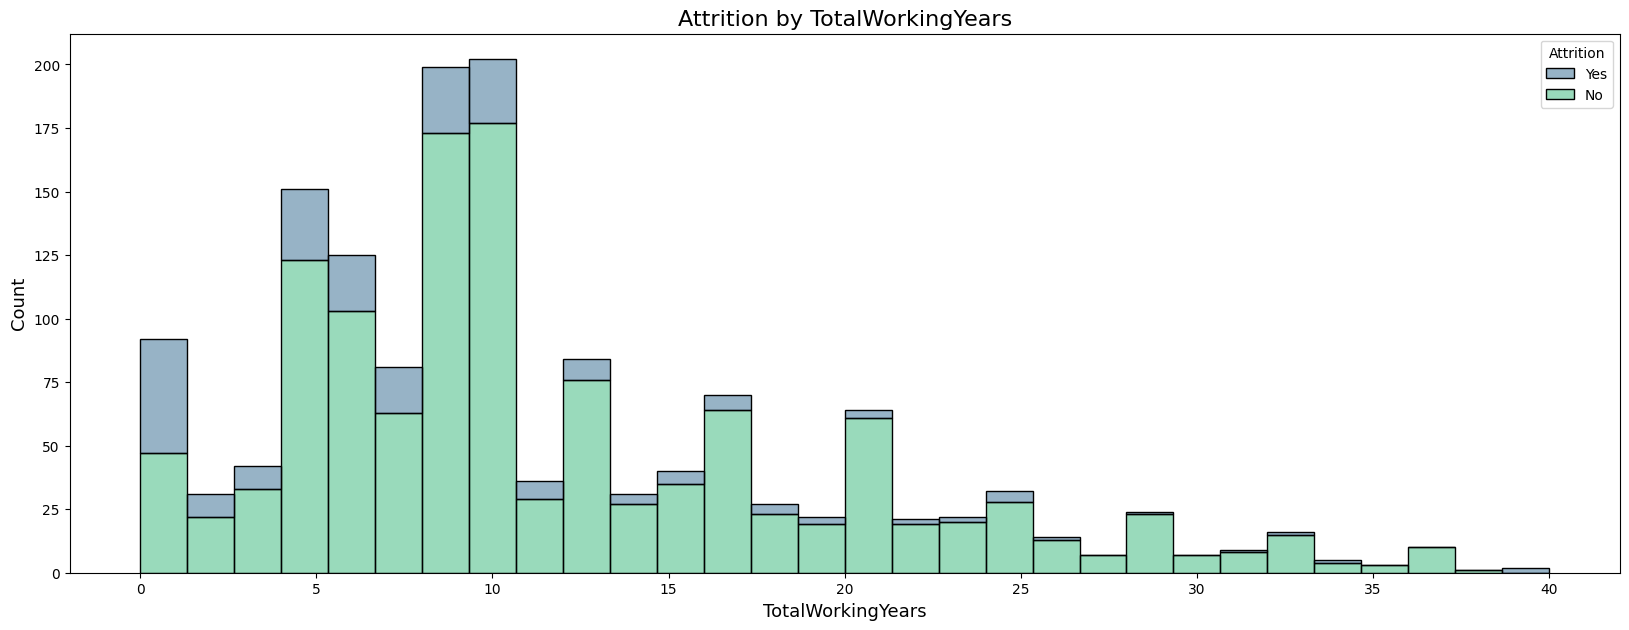

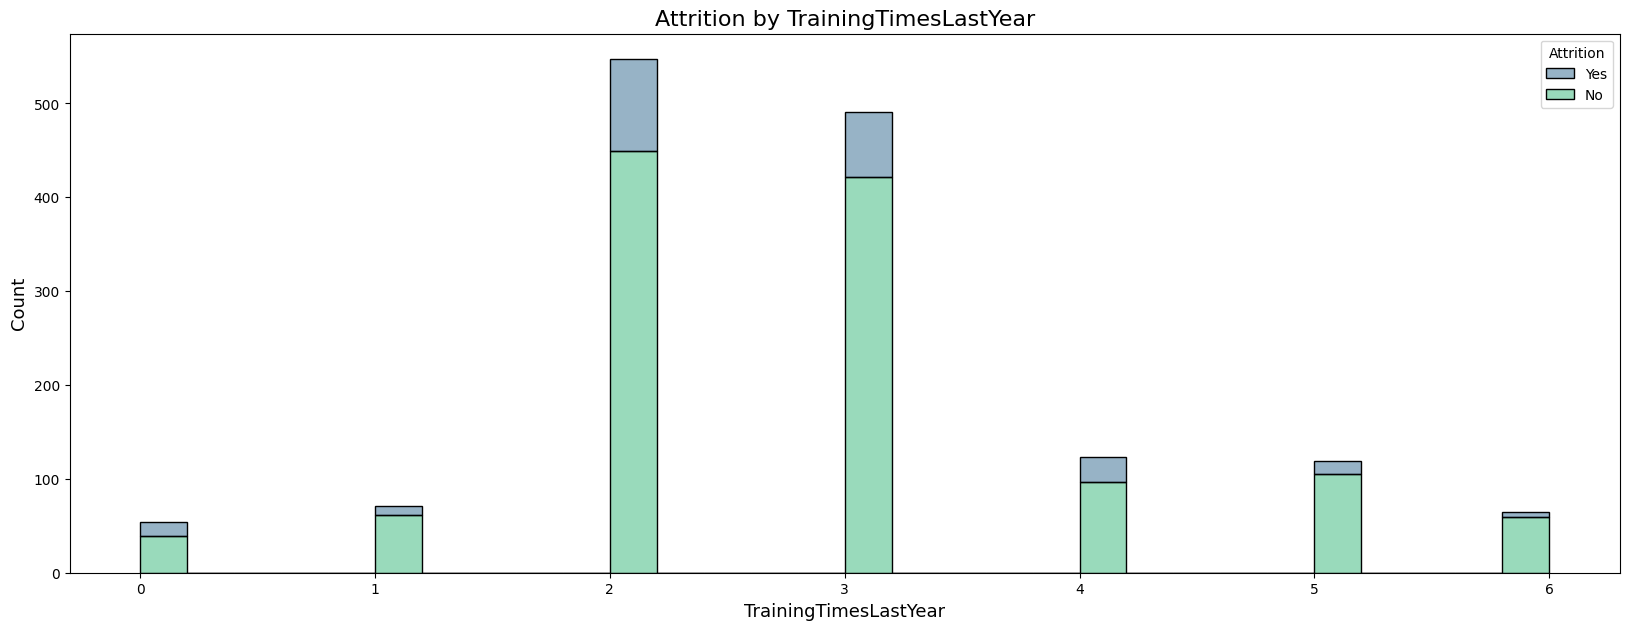

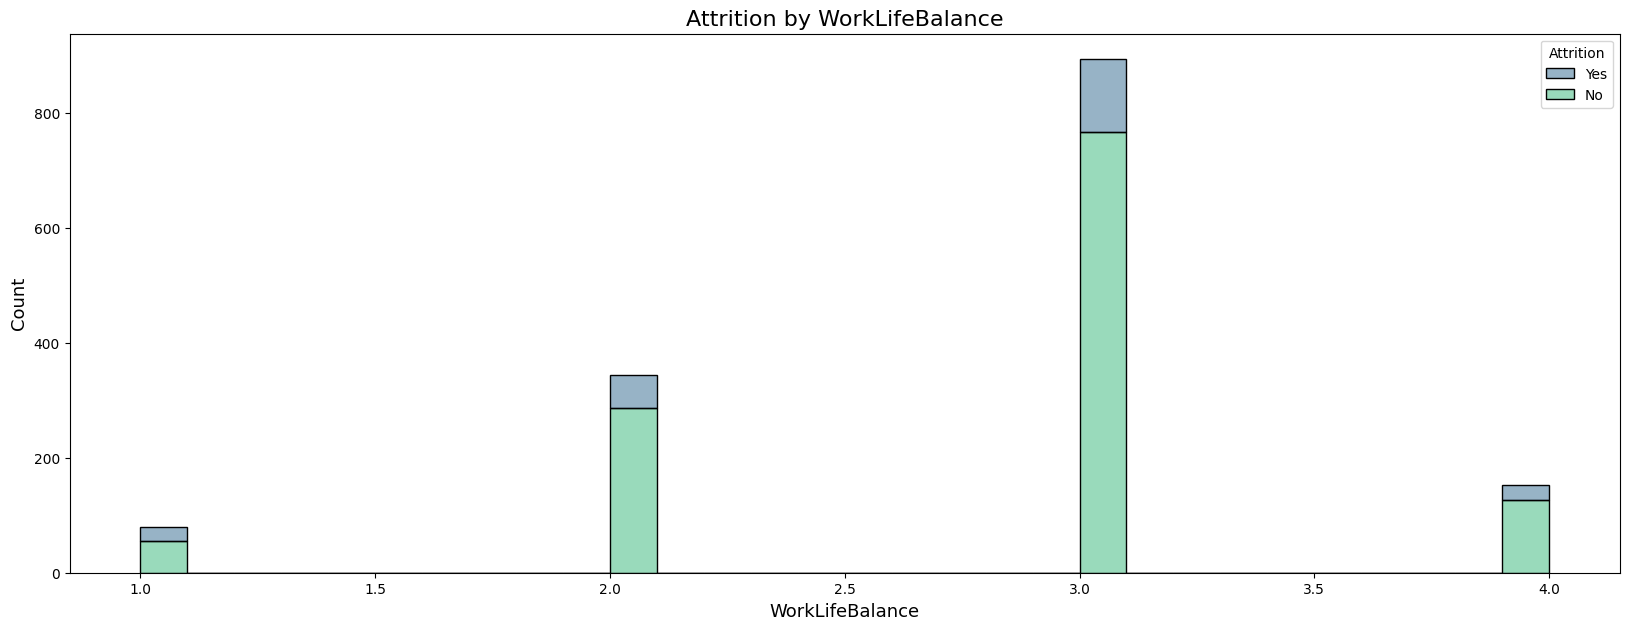

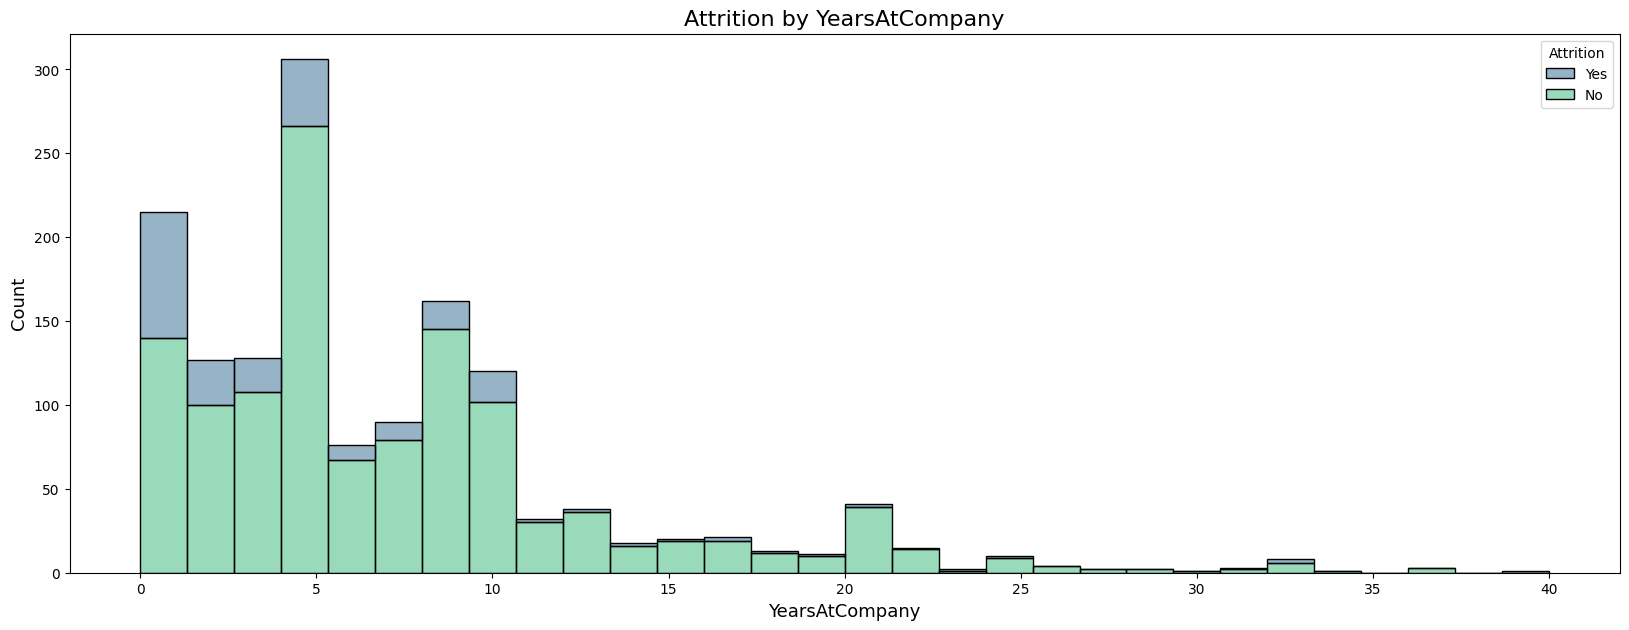

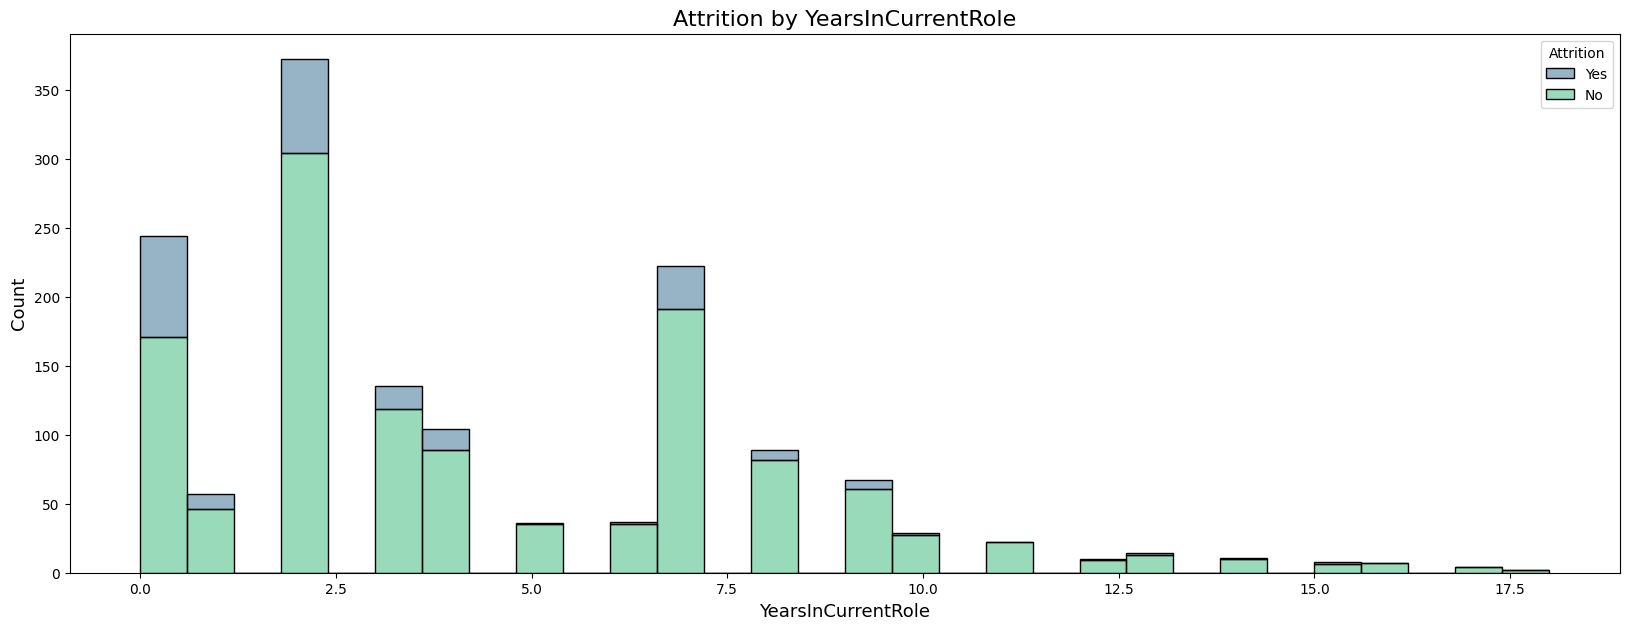

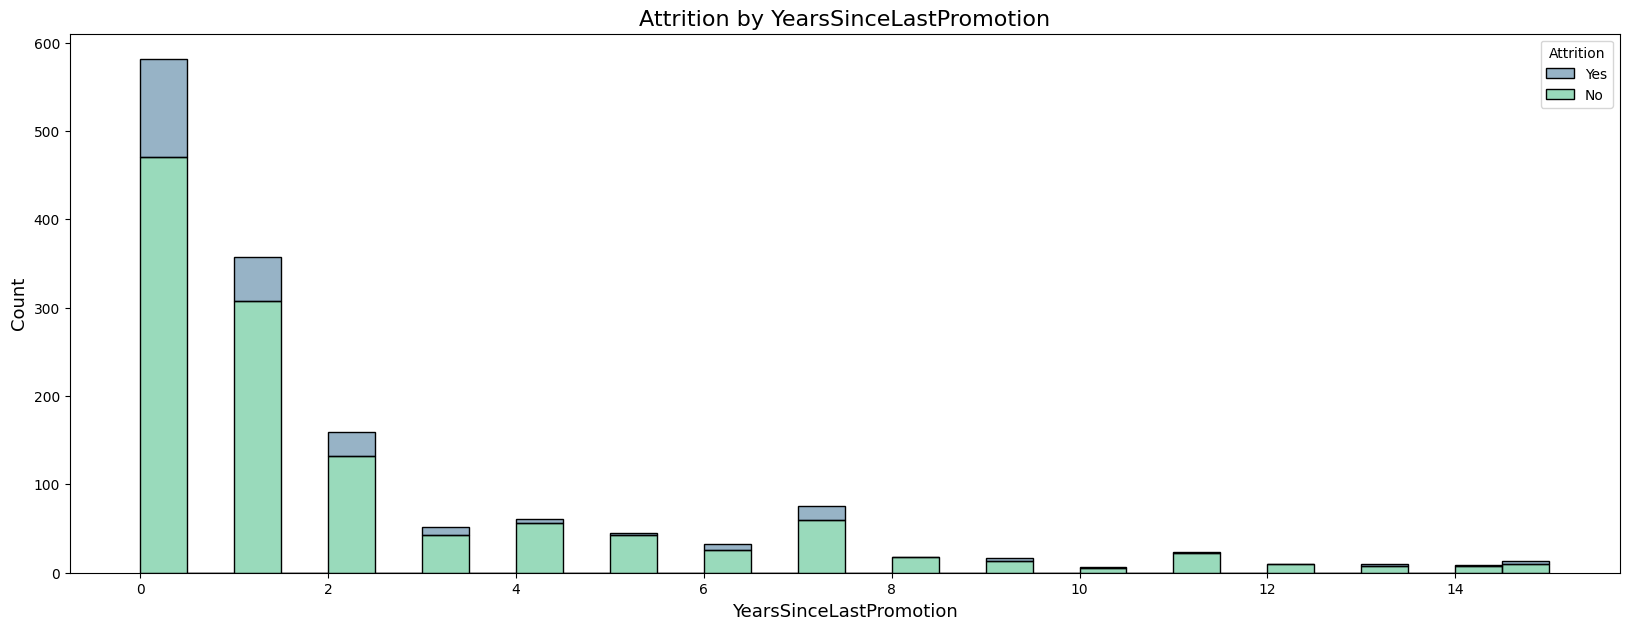

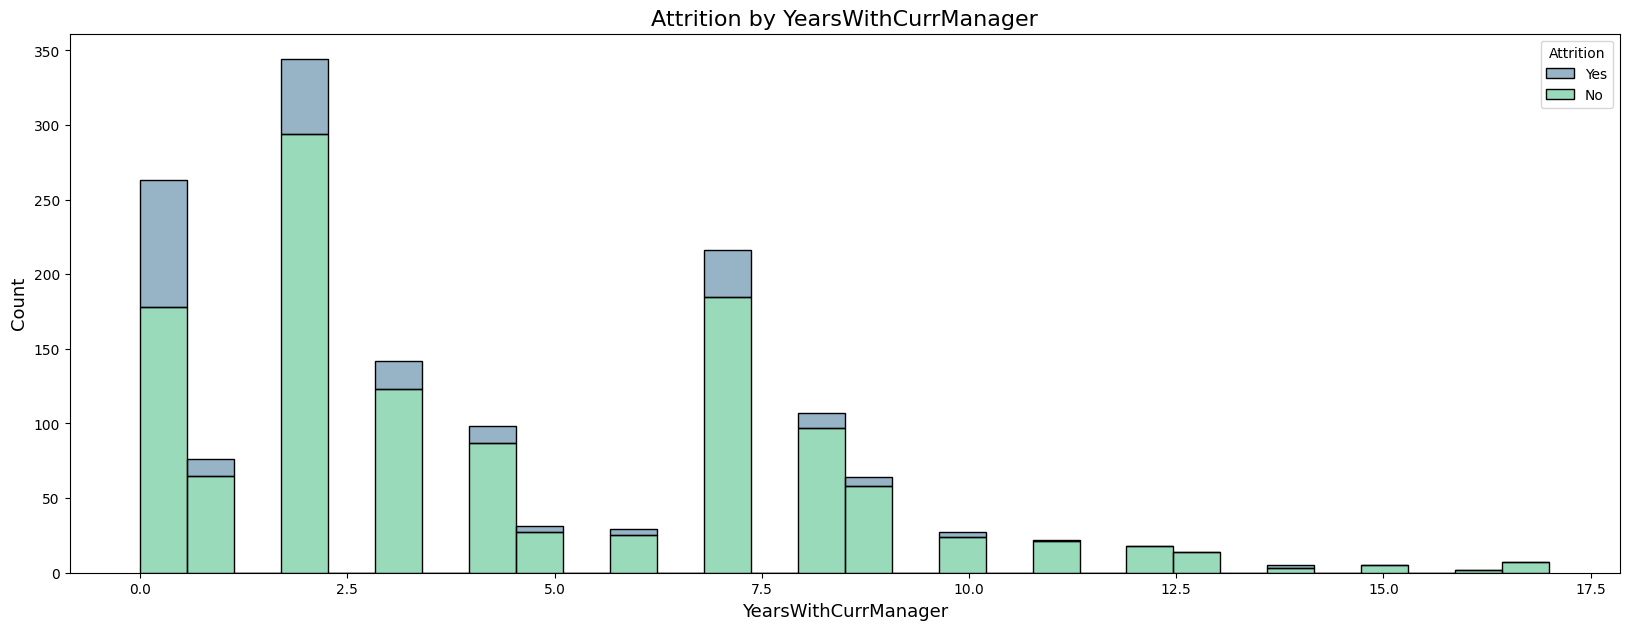

In [8]:
for col in employee_data.select_dtypes(include='number').columns:
    plt.figure(figsize=(20, 7))
    
    sns.histplot(data=employee_data, x=col, hue='Attrition', kde=False, palette='viridis', multiple='stack', bins=30, alpha=0.5)
    
    plt.title(f'Attrition by {col}', fontsize=16)
    plt.xlabel(col, fontsize=13)
    plt.ylabel('Count', fontsize=13)
    plt.show()

### Features and Target Definition
Here, the dataset is divided into features (X) and the target (y), where Attrition is the target variable.

In [9]:
X = employee_data.drop(columns=['Attrition'])
y = employee_data['Attrition']

### Encoding Categorical Variables
Categorical columns are one-hot encoded to convert them into numerical format. For binary categories, one column is dropped to avoid multicollinearity.

In [10]:
# Encoding categorical variables
categorical_cols = X.select_dtypes(include=[object]).columns.tolist()

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X = X.astype(int)
#Encode Attrition
y = LabelEncoder().fit_transform(y)

### Correlation Matrix
A heatmap of the correlation matrix is created to identify relationships between features, helping in feature selection.

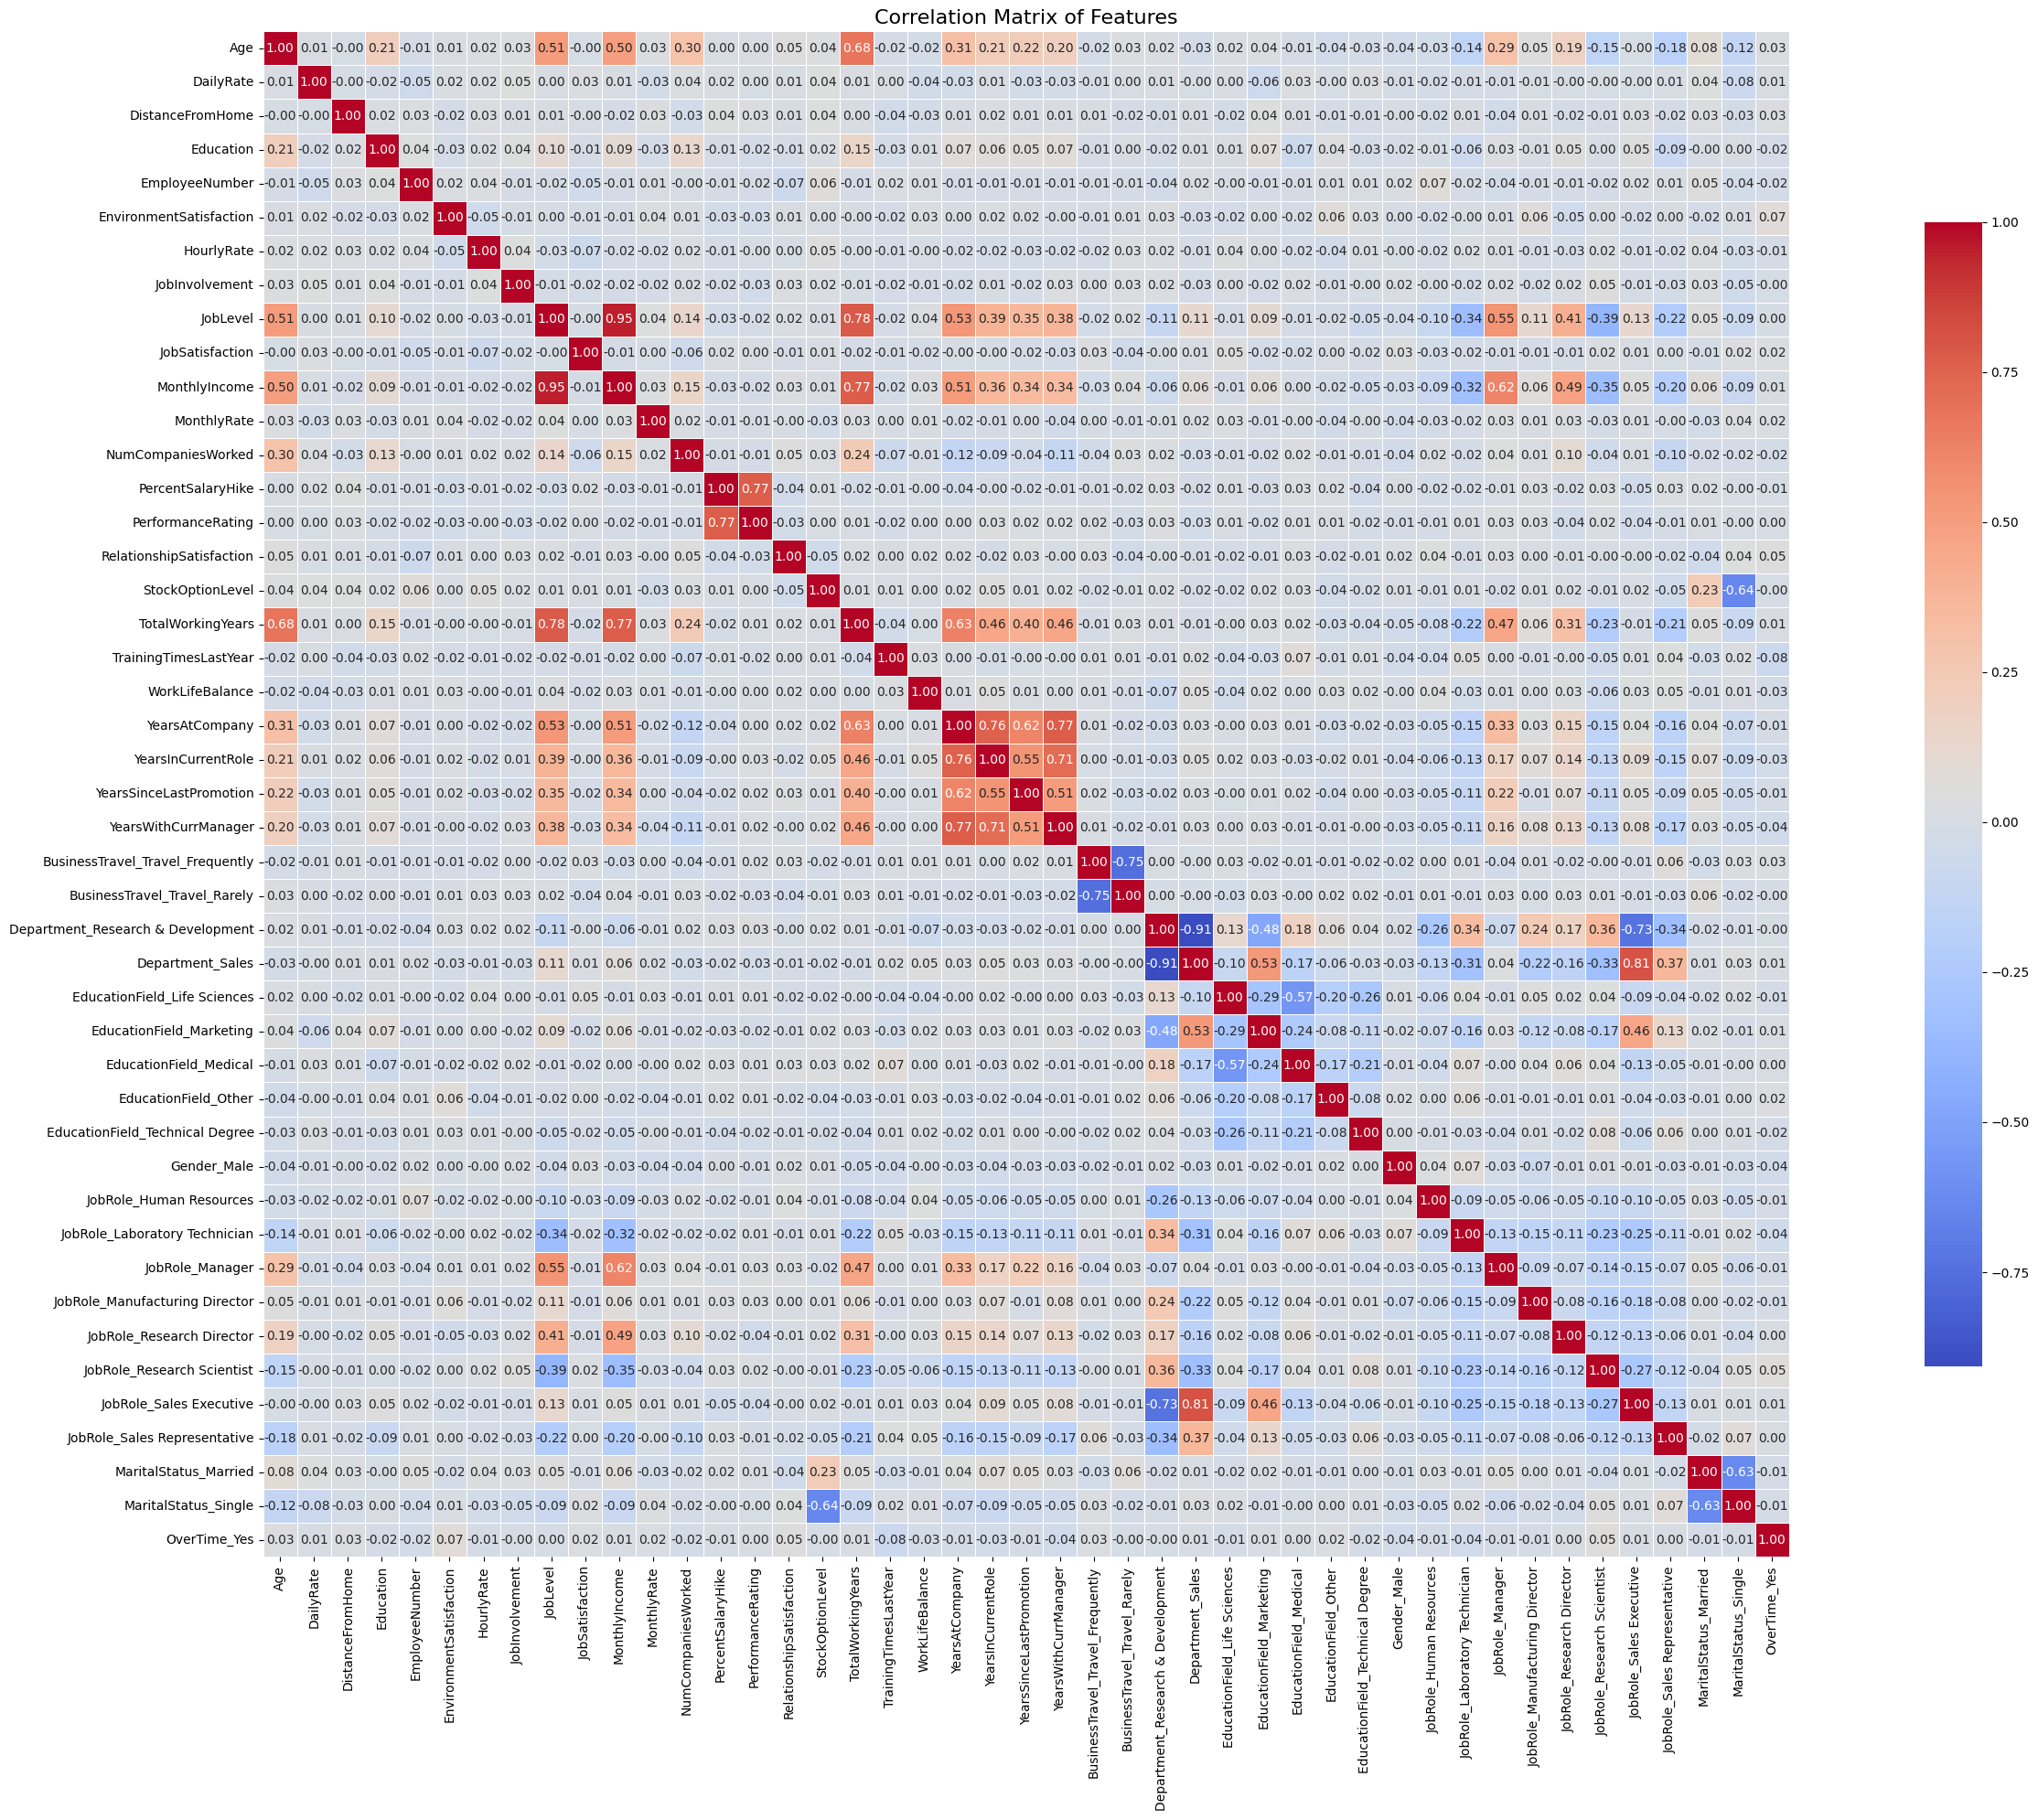

In [11]:

correlation_matrix = X.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, 
            cbar_kws={"shrink": .75}, linewidths=.5)
plt.title('Correlation Matrix of Features', fontsize=16)
plt.tight_layout()
plt.show()

#### Findings
Since the Job Level and Monthly Income are very correlated i am going to remove the Monthly Income since i can work with a range of 5 levels.
We can also check a high correlation in the columns Years at company, Years at current Role, Years since last promotion and years with current manager so we will remove Years at current Role, Years since last promotion and years with current manager.
Another high correlation we can find is between 

In [12]:
X = X.drop(columns=['MonthlyIncome','TotalWorkingYears','YearsInCurrentRole','YearsWithCurrManager'])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EmployeeNumber                     1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyRate                        1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  PercentSalaryHike   

# Supervised 

## Hold out

### Decision Tree, Model Training and Visualization

#### Train Test Split
The data is split into training (70%) and testing (30%) sets.

In [13]:
# Holdout 30% for testing and 70% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Decision Tree Model
We use a Decision Tree classifier to predict attrition. The model is trained on the training set, and its performance is evaluated on the test set.

In [14]:
# Create a decision tree model
dt_classifier = DecisionTreeClassifier(random_state=1234)
dt_classifier = dt_classifier.fit(X_train, y_train) 

#### Model Visualization
We visualize the trained Decision Tree to understand the decision-making process.

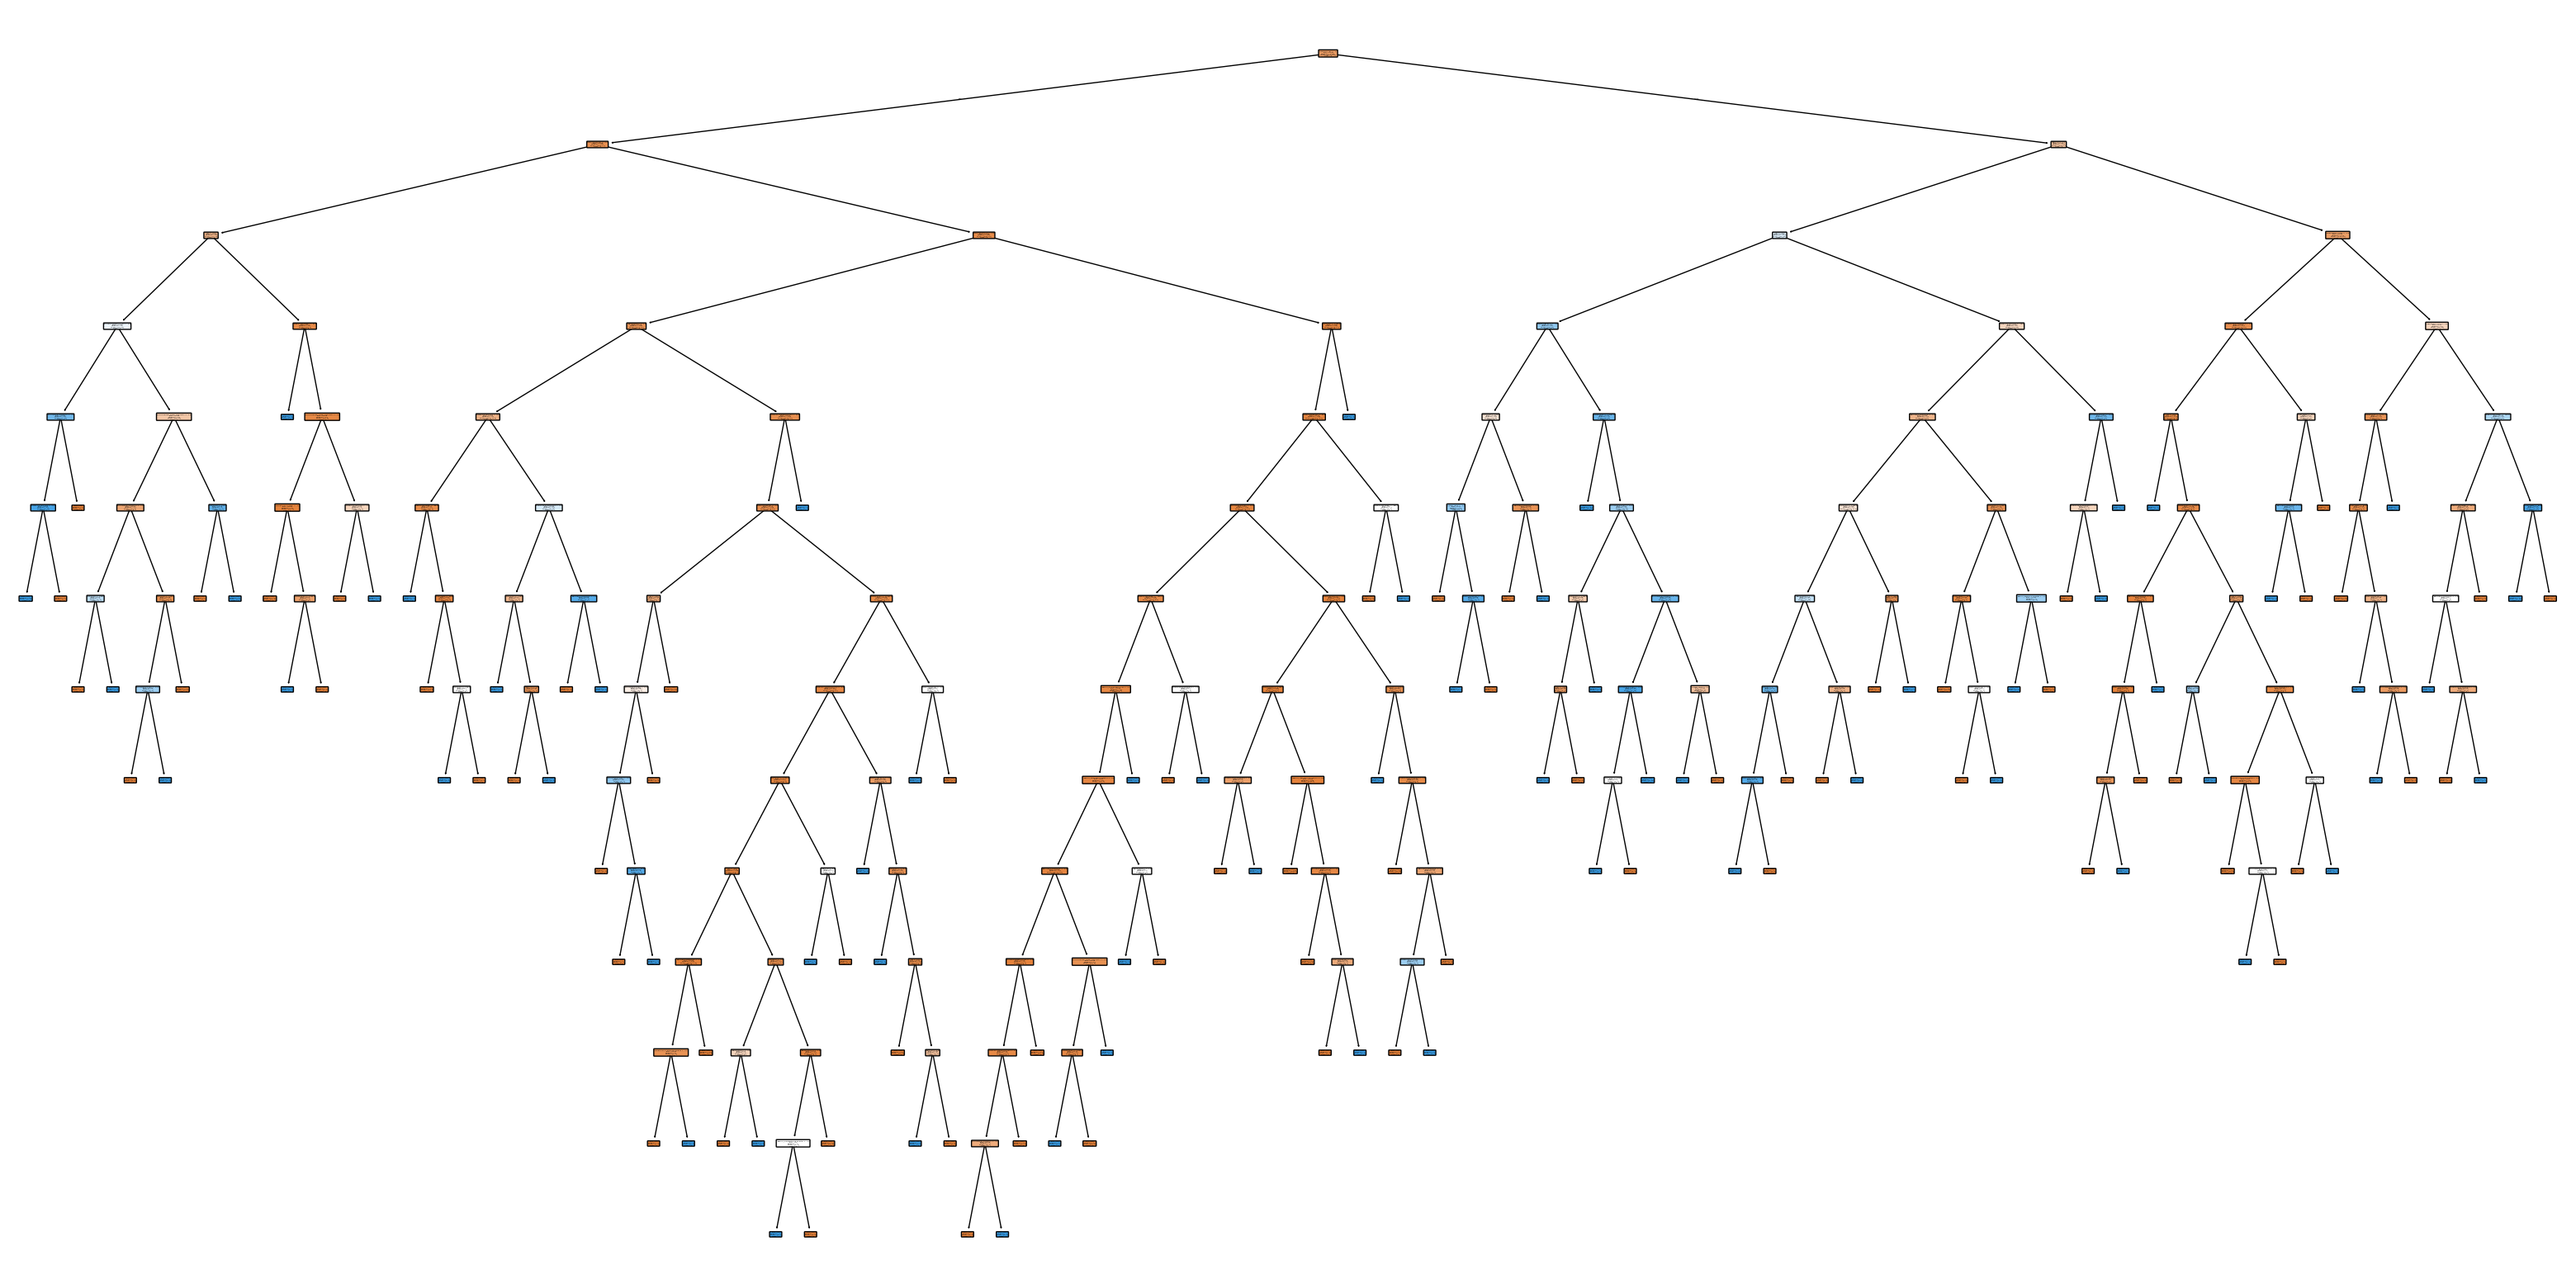

In [15]:
# Shows the dt_classifier as a tree
plt.figure(figsize=(40,20))
tree.plot_tree(dt_classifier,
               feature_names=X.columns,
               class_names=list(map(str, np.unique(y))),  # Convert class names to strings
               filled=True, rounded=True)
plt.show()

#### Predictions and Accuracy
The model's predictions are compared to actual values in the test set to calculate accuracy.

In [16]:
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7936507936507936


### Classification Report && Confusion Matrix
The classification report provides precision, recall, and F1-score for each class.
A heatmap visualizes the confusion matrix, showing the number of correct and incorrect prediction

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       380
           1       0.30      0.38      0.34        61

    accuracy                           0.79       441
   macro avg       0.60      0.62      0.61       441
weighted avg       0.81      0.79      0.80       441



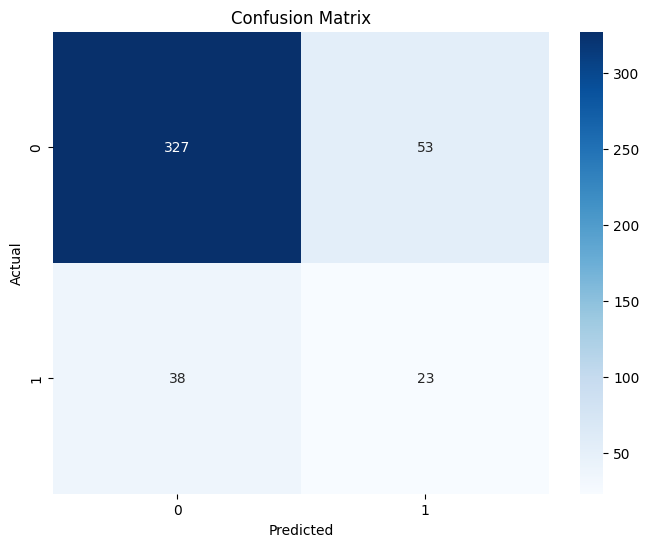

In [17]:
# Classification Report
print(classification_report(y_test,y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

As we can see this has a aproximate accuracy of 79%

## Cross Validation

### Data Prep
First, we define the relevant features and target for training the classifier.
Then, we create a configure the classifier

In [18]:
# Prepare the data
employee_data_feature_names = ['Age','JobLevel', 'YearsAtCompany', 'Education']
employee_data_features = employee_data[employee_data_feature_names]

employee_data_target = employee_data['Attrition']
employee_data_target_names = list(set(employee_data_target))

#print('Features:',employee_data_feature_names, '   Classes:', employee_data_target_names)

# Instantiate the model
cv_classifier = DecisionTreeClassifier(random_state=27)

Firstly, we evaluate the mode using a 10-fold cross validation and we output the mean ant standard deviantion of the accuracy

In [19]:
# Evaluate the model using cross validation (Accuracy)
acc_score = cross_val_score(cv_classifier, X_train, y_train, cv=10)
print("CV Mean Accuracy: %0.3f (+/- %0.3f)" % (acc_score.mean(), acc_score.std()) )

CV Mean Accuracy: 0.774 (+/- 0.033)


Then we perform a 10-fold cross validation with the f1 score.

In [20]:
# Evaluate the model using cross validation (F1)
f1_score = cross_val_score(cv_classifier, X_train, y_train, cv=10, scoring='f1_macro')
print("CV Mean F1: %0.3f (+/- %0.3f)" % (np.mean(f1_score), np.std(f1_score)) )

CV Mean F1: 0.621 (+/- 0.046)


### Training the model
Here we train the classifier with the full dataset (features and targets)

In [21]:
# Build the model with the complete data
final_classifier = cv_classifier.fit(employee_data_features, employee_data_target)

### Prediction on New Data
Now we will make predictions of the Attrition value to an array of "new employees" containing :
-Age
-JobLevel
-YearsAtCompany
-Education

The prediction will be made based on those features

In [22]:
newData = np.array([[58,1, 1, 1], [56,1, 1, 1], [56,5, 5, 4], [26,1, 1, 3], [21,1, 1, 3],[45,5,24,3]])
prediction = final_classifier.predict(newData)
print("Prediction:", prediction)

Prediction: ['Yes' 'Yes' 'No' 'Yes' 'Yes' 'No']


c:\Users\rdmf1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Model Evaluation
#### Classification report
This provides detailed metrics for the Attrition class (Precision, Recall, f1, support)

In [23]:
print("Precision, Recall,  f1, support")
print(classification_report(employee_data_target, final_classifier.predict(employee_data_features), digits=3))

Precision, Recall,  f1, support
              precision    recall  f1-score   support

          No      0.944     0.996     0.969      1233
         Yes      0.970     0.692     0.808       237

    accuracy                          0.947      1470
   macro avg      0.957     0.844     0.889      1470
weighted avg      0.948     0.947     0.943      1470



This will display a confusion matrix showing the:
- True Positives
- False Positives
- False Negatives
- True Negatives

In [24]:
print("Confusion matrix")
print(confusion_matrix(employee_data_target, final_classifier.predict(employee_data_features)))

Confusion matrix
[[1228    5]
 [  73  164]]


# Unsupervised
## K-Means Clustering

### Data Preparation
We begin by preparing the data for clustering. This includes encoding categorical features and standardizing the numerical features.


In [25]:
# copy of the original data
kmeans_data = employee_data.copy()
employee_cols_names = kmeans_data.columns.values.tolist()

#### Categorical Columns Encoding
This will indentify categorical columns () text values and convert them into numerical values

In [26]:
label_encoder = LabelEncoder()

categorical_cols = kmeans_data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    kmeans_data[col] = label_encoder.fit_transform(kmeans_data[col])

#### Standardize Numerical Features
Standardizes the numerical data. This ensures that all features contribute equally to the distance calculation used in KMeans.

In [27]:
scaler = StandardScaler()
employee_scaled = scaler.fit_transform(kmeans_data)

We then convert the scaler into a pandas DataFrame

In [28]:
employee_scaled = pd.DataFrame(employee_scaled, columns=employee_cols_names)
print(employee_scaled.head())

        Age  Attrition  BusinessTravel  DailyRate  Department  \
0  0.446350   2.280906        0.590048   0.742527    1.401512   
1  1.322365  -0.438422       -0.913194  -1.297775   -0.493817   
2  0.008343   2.280906        0.590048   1.414363   -0.493817   
3 -0.429664  -0.438422       -0.913194   1.461466   -0.493817   
4 -1.086676  -0.438422        0.590048  -0.524295   -0.493817   

   DistanceFromHome  Education  EducationField  EmployeeNumber  \
0         -1.010909  -0.891688       -0.937414       -1.701283   
1         -0.147150  -1.868426       -0.937414       -1.699621   
2         -0.887515  -0.891688        1.316673       -1.696298   
3         -0.764121   1.061787       -0.937414       -1.694636   
4         -0.887515  -1.868426        0.565311       -1.691313   

   EnvironmentSatisfaction    Gender  HourlyRate  JobInvolvement  JobLevel  \
0                -0.660531 -1.224745    1.383138        0.379672 -0.057788   
1                 0.254625  0.816497   -0.240677       -

### Clustering
We will be useing the Elbow Method and Silhouette Score to determine the best number of clusters (k) for the KMeans algorithm.
For this case we observe the plot to identify the value of k where the inertia reduction slows down. (Elbow Method) 

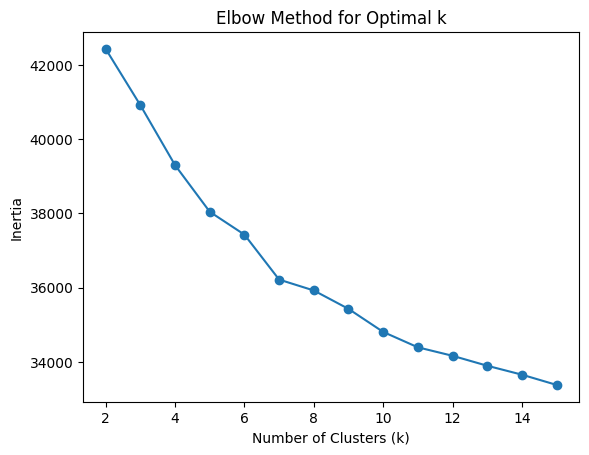

In [29]:
inertia = []
silhouette_scores = []
k_values = range(2, 16)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(employee_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(employee_scaled, kmeans.labels_))

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

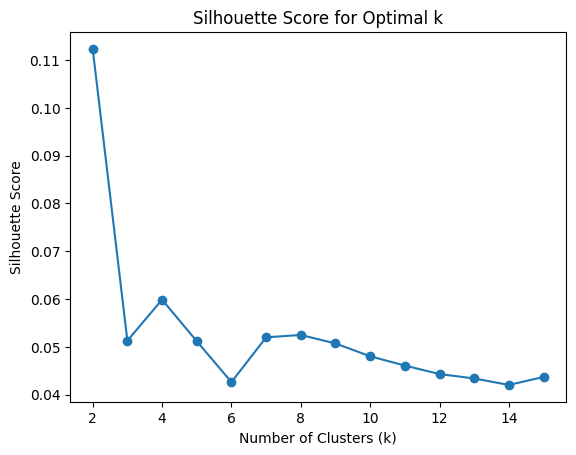

In [30]:
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

### Training the K/Means
After evaluating the elbow plot and the Silhouette Score, we assume the optimal number of clusters is 5 (as indicated by the elbow).

In [31]:
# Assuming the elbow is at seven clusters
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(employee_scaled)

# Add cluster assignment to kmeans_data data
kmeans_data['cluster'] = clusters
kmeans_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cluster
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,3
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,2
2,37,1,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,3
3,33,0,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0


### Analyzing Cluster Characteristics
We now analyze the average values for features within each cluster.

In [32]:
# Group data by cluster and calculate the mean of sepal_length and petal_length
cluster_averages = kmeans_data.groupby('cluster')[['MonthlyIncome', 'YearsAtCompany']].mean()

# Display the results
print(cluster_averages)

         MonthlyIncome  YearsAtCompany
cluster                               
0          4153.859091        3.713636
1         14927.926471       21.088235
2          6188.299465       10.229947
3          3903.226221        3.470437
4         14264.381679        4.763359


### Visualize the cluster
Finally, we visualize the cluster assignments using a scatter plot of MonthlyIncome vs YearsAtCompany.

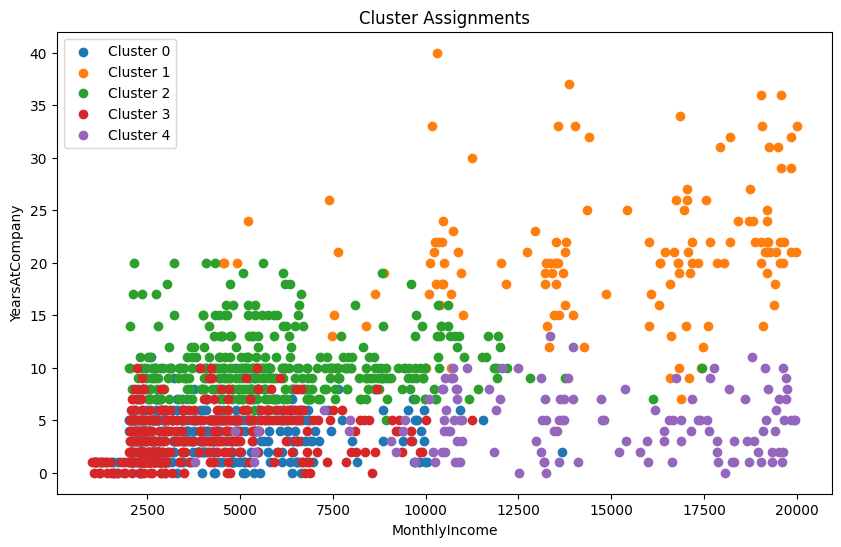

In [33]:
# Visualize cluster assignments
plt.figure(figsize=(10, 6))
for cluster_id in range(optimal_k):
    cluster_data = kmeans_data[kmeans_data['cluster'] == cluster_id]
    plt.scatter(cluster_data['MonthlyIncome'], cluster_data['YearsAtCompany'], label=f'Cluster {cluster_id}')

plt.xlabel('MonthlyIncome')
plt.ylabel('YearsAtCompany')
plt.title('Cluster Assignments')
plt.legend()
plt.show()